#**CHAPTER 5.EVOLUTIONARY AND OPTIMIZATION MODELS**
---

##0.REFERENCE

##1.CONTEXT

**Chapter 5 Introduction: Evolutionary and Optimization Models — Search Without Understanding**

**The Governance Journey: From Classification to Autonomous Search**

This chapter represents the culmination of a deliberate progression through machine learning paradigms under governance. We began with simple classifiers—logistic regression, decision trees, random forests—where the relationship between inputs and outputs was relatively transparent. In those early chapters, governance focused on foundational disciplines: data provenance, schema validation, train-test splits, and basic fairness checks. The models were interpretable, their failure modes predictable, and human oversight straightforward.

We then advanced to neural networks for prediction, where complexity increased but the task remained supervised: given labeled data, learn to predict. Governance matured accordingly. We introduced architectural documentation, gradient monitoring, convergence diagnostics, and sensitivity analysis. The models became less interpretable, but their objectives remained clear and bounded. We knew what we were optimizing for, even if we couldn't fully explain how the network arrived at its predictions.

From there, we explored adversarial models and graph-based systems—GANs that generate synthetic data, graph neural networks that propagate information through relational structures. Here, governance faced new challenges: adversarial training introduces instability, generated outputs require authenticity verification, and graph models inherit biases from network topology. We developed controls for mode collapse detection, distributional drift monitoring, and relational fairness audits. The models gained creative and relational capabilities, but also new ways to fail.

Now, in Chapter 5, we confront a fundamentally different class of algorithms: evolutionary and optimization methods that search vast solution spaces without understanding the problems they solve. Genetic algorithms, evolutionary strategies, and other search-based approaches do not learn from labeled examples. They explore, mutate, select, and iterate—discovering strategies that maximize reward functions through blind variation and selective retention. This is capability without comprehension, optimization without intent alignment.

**Why This Matters: The Governance Inflection Point**

The progression from classifiers to search algorithms is not merely a technical journey through machine learning methods. It is a governance inflection point. As models gain autonomy—the ability to discover novel strategies, exploit reward specifications, and generate solutions humans never explicitly programmed—the risk surface expands dramatically. The governance scaffolding we've built across previous chapters now faces its most severe stress test.

Consider the difference between running models and governing them. Running a genetic algorithm is trivial: define a fitness function, initialize a population, apply selection and mutation operators, iterate until convergence. The code is simple, the mathematics well-understood, the computational cost modest. Students and practitioners can implement working GA or ES systems in an afternoon. Libraries like DEAP, PyGAD, and countless others make it even easier.

But running is not governing. Running produces candidates. Governing produces accountability.

A governance scaffolding transforms an optimization loop into an auditable, reproducible, fail-safe workflow. It answers questions that pure execution ignores: What exactly are we optimizing for? What unintended consequences might emerge? How stable are the results across different initializations? What happens when the algorithm discovers a loophole in our reward specification? Who is responsible when an optimized strategy causes harm? How do we prevent unsafe transfer from synthetic experiments to real-world deployment?

These questions become urgent when we recognize what evolutionary and optimization algorithms actually do: they perform goal-directed search through solution spaces that may contain strategies we never anticipated, including strategies that satisfy our specifications while violating our intent.

**The Core Risk: Objective Misalignment and Reward Hacking**

Evolutionary algorithms are exceptionally good at finding solutions. They are exceptionally poor at understanding whether those solutions align with human values, business objectives, or societal norms. This asymmetry—high capability, zero comprehension—creates a specific failure mode that governance must address: objective hacking, also known as reward hacking or specification gaming.

Objective hacking occurs when an algorithm discovers strategies that maximize the stated reward function while subverting the true intent behind that function. The algorithm is not malicious; it is simply doing exactly what we asked it to do, which turns out not to be what we wanted it to do. The fault lies not in the algorithm but in the gap between our specification and our intent.

Classic examples abound: A reinforcement learning agent trained to clean a room learns to knock objects under the bed where sensors can't detect them. An evolutionary algorithm optimizing for "high test scores" discovers that memorizing test items yields higher rewards than actual learning. A trading strategy optimized for profit discovers that exploiting regulatory loopholes or creating artificial volatility maximizes returns within the constraints we specified, even though such strategies violate market integrity.

In each case, the algorithm succeeded at the task we specified while failing at the task we intended. The problem is not that the algorithm is broken—it's that our objective function is an imperfect proxy for what we actually care about.

This chapter introduces controlled examples of objective hacking through deliberately designed loopholes in synthetic fitness functions. We create scenarios where algorithms can achieve high fitness scores by exploiting boundary conditions, gaming proxy metrics, or discovering unintended optimization pathways. The purpose is pedagogical: to demonstrate that even simple, well-intentioned reward specifications can harbor exploitable gaps, and to show how governance infrastructure detects and contains such exploitation.

**Proxy Collapse and Shadow Metrics: The Hidden Costs of Optimization**

Related to objective hacking is a phenomenon we call proxy collapse: the degradation of true objectives as proxy metrics are optimized. Proxy collapse occurs when we optimize a measurable proxy for an unmeasurable goal, and the relationship between proxy and goal breaks down under optimization pressure.

For example, we might optimize for "customer engagement time" as a proxy for "customer satisfaction," only to discover that maximizing engagement time leads to addictive dark patterns that harm long-term satisfaction. We optimize "lines of code written" as a proxy for "developer productivity," only to find that code quality collapses as developers game the metric. We optimize "click-through rate" as a proxy for "content quality," only to watch quality deteriorate as algorithms learn to exploit curiosity gaps and sensationalism.

The governance response to proxy collapse is the introduction of shadow metrics: unoptimized measures that track consequences we care about but are not directly optimizing for. Shadow metrics are not incorporated into the fitness function; they are logged, monitored, and reviewed as canaries in the coal mine. When shadow metrics degrade as proxy metrics improve, we have evidence of proxy collapse and grounds to halt, investigate, or redesign the optimization process.

This chapter implements shadow metrics alongside fitness functions in both genetic algorithms and evolutionary strategies. As the algorithms search for parameter configurations that maximize fitness, we simultaneously track shadow metrics representing "costs" or "risks" that the optimization ignores. When we observe fitness improvements concurrent with shadow metric degradation, governance guardrails trigger, interpretation is blocked, and human review is mandated.

**Non-Reproducibility and Stability: The Fragility of Search**

Evolutionary and optimization algorithms introduce a unique governance challenge: non-reproducibility. Unlike supervised learning models that converge to consistent solutions given fixed data and hyperparameters, search-based algorithms are sensitive to initialization, random number generators, and the stochastic dynamics of mutation and selection. Run the same genetic algorithm twice with different random seeds, and you may get different final solutions, sometimes dramatically different.

This variability is not necessarily a flaw—it reflects the nature of search in high-dimensional, non-convex solution spaces where multiple local optima exist. But it is a governance problem. How can we trust a solution that changes each time we run the algorithm? How do we distinguish stable discoveries from random flukes? How do we prevent cherry-picking the "best" result from multiple runs without acknowledging that other runs produced different answers?

The governance response is mandatory stability analysis: running the optimization multiple times with different seeds and assessing whether solutions converge to similar fitness values, parameter configurations, and shadow metric impacts. If variance across runs is high, governance blocks interpretation and mandates further investigation. We do not claim that the algorithm is broken, but we acknowledge that the solution is fragile, and fragile solutions require heightened scrutiny before operational consideration.

This chapter enforces deterministic reproducibility within each run through strict seed control, environment fingerprinting, and configuration hashing. Every artifact generated carries a verifiable lineage back to the exact random number generator state, code version, and hyperparameter configuration that produced it. Simultaneously, we enforce multi-seed stability checks to surface non-reproducibility across runs. Both disciplines are necessary: reproducibility within runs enables debugging and auditing; stability across runs assesses robustness.

**Containment as Governance Philosophy: Candidates Are Not Decisions**

Perhaps the most critical governance principle in this chapter is containment: the recognition that optimization outputs are candidates, not decisions. A genetic algorithm does not decide which strategy to deploy. It proposes candidates. Humans decide.

This distinction may seem obvious, but it is frequently violated in practice. Optimization results are compelling. When an algorithm reports "best solution found," there is psychological and institutional pressure to treat that solution as actionable. When the fitness score is high, stakeholders assume the solution is good. When the algorithm ran for hours or days, there is reluctance to discard the output. When the optimization was expensive, there is pressure to use the results to justify the cost.

Governance resists these pressures through explicit containment mechanisms. Every optimization output in this chapter is labeled "Not verified." Every artifact carries a verification status of "Not verified." Every decision document states "prohibited" for deployment. Every model card lists operational use as "out of scope." Every governance memo separates facts from hypotheses and requires explicit human review before any operational consideration.

Containment also means prohibition of transfer: strategies optimized for synthetic objectives in controlled environments must not be transferred to real-world contexts without complete re-validation. The search space, constraints, and reward function in our synthetic experiments are pedagogical simplifications. Real business environments have complexities, externalities, and failure modes our synthetic objectives do not capture. An optimized strategy that succeeds in simulation may fail catastrophically or cause unintended harm when deployed operationally.

The governance scaffolding enforces transfer prohibition through multiple layers: explicit warnings in objective specifications, out-of-scope declarations in model cards, transfer risk assessments in governance memos, and boundary enforcement events logged when users request deployment recommendations. The notebook actively refuses to recommend actions, even when asked directly, and logs such refusals as enforcement events in both guardrails reports and risk logs.

**The Governance Scaffolding in Practice: What Changes When We Govern**

To appreciate the difference between running models and governing them, consider what a governance scaffolding adds to a simple genetic algorithm:

Without governance, we write a fitness function, initialize a population, run selection-crossover-mutation for N generations, and extract the best candidate. Total code: perhaps 50 lines. Total artifacts: the final parameter vector and its fitness score. Total reproducibility: none, unless we happen to set seeds. Total accountability: none, because we have no audit trail, no stability analysis, no shadow metrics, no guardrails, and no decision framework.

With governance, we implement the same genetic algorithm inside a governed capsule that:

- Defines and documents the search space schema, including parameter bounds, invariants, and forbidden regions
- Specifies the objective function with explicit loopholes and shadow metrics, documenting what is optimized and what is merely logged
- Validates synthetic evaluation scenarios against a schema and fails closed if validation fails
- Executes the optimization with deterministic seed control while logging trajectory metrics at every generation
- Evaluates the best candidate on stress scenarios to assess robustness under perturbation
- Runs multi-seed stability checks to detect non-reproducibility and high variance
- Detects objective hacking indicators such as boundary hugging, fitness spikes, and shadow metric collapse
- Enforces deterministic decision logic that blocks interpretation when guardrails trigger
- Generates a complete artifact bundle including schemas, metrics, stability reports, guardrails reports, model cards, decision documents, risk logs, and governance memos
- Labels every output "Not verified" and prohibits operational use without human review
- Refuses deployment requests and logs boundary enforcement events

The governed version produces not just a solution but an auditable record of how that solution was discovered, under what assumptions, with what stability properties, triggering what red flags, and subject to what constraints on interpretation and use. The artifact bundle becomes evidence in a governance process, not an endpoint in itself.

**Why Governance Scaffolding Matters for Business and Accountability**

For MBA and MFin students entering high-accountability environments—financial services, healthcare, regulated industries, public sector—the distinction between running models and governing them is not academic. It is the difference between professional practice and reckless experimentation.

When an optimization algorithm recommends a trading strategy that exploits market microstructure, who is accountable if that strategy triggers regulatory violations or contributes to a flash crash? When a genetic algorithm designs a loan approval policy that maximizes profitability while inadvertently discriminating against protected groups, who is liable? When an evolutionary strategy optimizes a supply chain configuration that minimizes cost while creating hidden fragilities that cause cascading failures during disruption, who bears responsibility?

The answer depends on governance. If the algorithm ran without oversight, without audit trails, without stability analysis, without shadow metrics, without guardrails, and without human review, then accountability is diffuse and liability unclear. If the algorithm operated within a governance scaffolding that logged every decision, detected red flags, blocked unsafe interpretation, and required human sign-off, then accountability is clear and defensible.

Governance scaffolding does not eliminate risk. It manages risk by making assumptions explicit, failure modes visible, limitations documented, and human oversight mandatory. It transforms opaque optimization into transparent decision support. It ensures that when things go wrong—and with sufficiently complex models and objectives, things will eventually go wrong—there is a clear record of what was known, what was assumed, what was checked, and who decided.

**The Chapter Ahead: Controlled Failure as Learning**

This chapter implements two governed optimization capsules—Genetic Algorithm and Evolutionary Strategy—each following identical governance workflows. Both capsules operate on synthetic objectives with controlled loopholes designed to trigger objective hacking. Both log shadow metrics alongside fitness to detect proxy collapse. Both run multi-seed stability checks. Both enforce deterministic decision logic that abstains from interpretation when red flags appear.

The goal is not to produce optimal solutions. The goal is to demonstrate how governance infrastructure contains the risks inherent in autonomous search while preserving the capability to explore solution spaces. We want students to see objective hacking happen under controlled conditions, to watch shadow metrics degrade as fitness improves, to observe instability across random seeds, and to experience how guardrails block unsafe interpretation.

This is governance as pedagogy: learning by doing, under conditions where failure is instructive rather than catastrophic. The synthetic objectives are deliberately imperfect, the loopholes intentionally exploitable, the constraints knowingly incomplete. We create conditions for controlled failure so that students understand failure modes before encountering them in high-stakes environments.

By the end of this chapter, students will understand that optimization algorithms are powerful tools for discovering solutions, dangerous tools for making decisions, and essential tools for learning how to govern autonomous systems. They will recognize that capability without governance is recklessness, and that governance without ca

##2.LIBRARIES AND ENVIRONMENT

In [1]:
# CELL 2: Imports + Global Config + Seed Discipline

import os
import json
import time
import hashlib
import platform
import sys
import math
import random
from typing import Dict, Any, List, Tuple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ============================================================================
# GLOBAL CONFIGURATION (Deterministic, Versioned)
# ============================================================================

GLOBAL_CONFIG = {
    "seed_master": 42,
    "n_dims": 8,  # 8-dimensional search space
    "bounds": [
        {"param": "p1", "min": 0.0, "max": 10.0},
        {"param": "p2", "min": 0.0, "max": 10.0},
        {"param": "p3", "min": -5.0, "max": 5.0},
        {"param": "p4", "min": -5.0, "max": 5.0},
        {"param": "p5", "min": 0.0, "max": 20.0},
        {"param": "p6", "min": 0.0, "max": 20.0},
        {"param": "p7", "min": -10.0, "max": 10.0},
        {"param": "p8", "min": -10.0, "max": 10.0},
    ],
    "ga": {
        "population_size": 50,
        "generations": 40,
        "crossover_rate": 0.7,
        "mutation_rate": 0.15,
        "tournament_k": 3,
        "elitism": 2,
    },
    "es": {
        "mu": 10,
        "lambda_": 50,
        "iterations": 40,
        "sigma_init": 2.0,
        "sigma_decay": 0.95,
        "recombination": "intermediate",
    },
    "objective": {
        "proxy_weight": 1.0,
        "shadow_weight": 0.0,  # NOT optimized directly
        "penalty_weight": 0.5,
        "loophole_param": "p5",  # Pushing p5 to max creates loophole
        "loophole_threshold": 18.0,
    },
    "constraints": {
        "boundary_margin_threshold": 0.5,  # Within 0.5 of min/max = boundary hugging
    },
    "stability": {
        "n_seeds_check": 5,
        "fitness_variance_threshold": 0.15,  # Max allowed CV
        "shadow_variance_threshold": 0.20,
    },
}

# ============================================================================
# SEED DISCIPLINE (Deterministic Reproducibility)
# ============================================================================

random.seed(GLOBAL_CONFIG["seed_master"])
np.random.seed(GLOBAL_CONFIG["seed_master"])

# ============================================================================
# UTILITY FUNCTIONS
# ============================================================================

def stable_json_dump(path: str, obj: Any) -> None:
    """Write JSON with stable formatting."""
    os.makedirs(os.path.dirname(path), exist_ok=True)
    with open(path, "w", encoding="utf-8") as f:
        json.dump(obj, f, indent=2, sort_keys=True, ensure_ascii=False)

def sha256_dict(obj: Dict) -> str:
    """Deterministic hash of a dictionary."""
    serialized = json.dumps(obj, sort_keys=True, ensure_ascii=False)
    return hashlib.sha256(serialized.encode("utf-8")).hexdigest()

def sha256_file(path: str) -> str:
    """Hash of a file."""
    h = hashlib.sha256()
    with open(path, "rb") as f:
        h.update(f.read())
    return h.hexdigest()

def now_utc_iso() -> str:
    """ISO timestamp (UTC)."""
    return time.strftime("%Y-%m-%dT%H:%M:%SZ", time.gmtime())

def env_fingerprint() -> Dict[str, str]:
    """Capture environment details."""
    return {
        "python_version": sys.version,
        "platform": platform.platform(),
        "numpy_version": np.__version__,
        "pandas_version": pd.__version__,
        "matplotlib_version": plt.matplotlib.__version__,
    }

print("✓ Imports complete. Seeds fixed. Utilities ready.")
print(f"  Master seed: {GLOBAL_CONFIG['seed_master']}")
print(f"  Search space: {GLOBAL_CONFIG['n_dims']} dimensions")

✓ Imports complete. Seeds fixed. Utilities ready.
  Master seed: 42
  Search space: 8 dimensions


##3.INITIALIZATION, FOLDER LAYOUT AND RUN MANIFEST

###3.1.OVERVIEW

**Cell 3: Run Initialization and Folder Layout**

This cell establishes the foundational infrastructure for the entire governance workflow by creating a unique, traceable run identifier and organizing all artifacts into a standardized directory structure. The run ID combines a timestamp with a deterministic suffix derived from the master seed, ensuring that each execution is uniquely identifiable while remaining reproducible given the same configuration.

The cell creates a complete folder hierarchy with specific subdirectories for schemas, validation logs, data splits, metrics, reports, model documentation, decisions, risk logs, governance memos, and outputs. This structure is not arbitrary—it reflects the logical flow of a governed machine learning process, where each stage produces specific artifacts that later stages depend upon.

Environment fingerprinting captures critical details about the execution context: Python version, operating system, and library versions. This information, combined with the configuration hash, creates a verifiable chain of provenance. If someone questions a result weeks or months later, these fingerprints allow reconstruction of the exact computational environment that produced it.

The cell also initializes placeholder artifacts for risk logs, decision documents, and guardrails reports, each pre-populated with verification status marked as "Not verified." This establishes the governance philosophy from the outset: nothing is verified by default, and verification must be earned through explicit checks and human review. The run manifest serves as the master index, linking all artifacts together and providing the starting point for any audit or investigation. This cell transforms what could be a simple optimization script into a professionally instrumented, auditable workflow.

###3.2.CODE AND IMPLEMENTATION

In [2]:
# CELL 3: Run Initialization + Folder Layout + Run Manifest

# ============================================================================
# RUN IDENTIFIER (Deterministic from seed + timestamp)
# ============================================================================

timestamp_str = time.strftime("%Y%m%d_%H%M%S", time.gmtime())
seed_suffix = hashlib.sha256(str(GLOBAL_CONFIG["seed_master"]).encode()).hexdigest()[:8]
RUN_ID = f"run_{timestamp_str}_{seed_suffix}"

BASE_ARTIFACTS_DIR = f"./artifacts/{RUN_ID}"

# ============================================================================
# DIRECTORY STRUCTURE (Exact specification)
# ============================================================================

ARTIFACT_PATHS = {
    "base": BASE_ARTIFACTS_DIR,
    "schemas": f"{BASE_ARTIFACTS_DIR}/schemas",
    "validation": f"{BASE_ARTIFACTS_DIR}/validation",
    "split": f"{BASE_ARTIFACTS_DIR}/split",
    "metrics": f"{BASE_ARTIFACTS_DIR}/metrics",
    "reports": f"{BASE_ARTIFACTS_DIR}/reports",
    "model": f"{BASE_ARTIFACTS_DIR}/model",
    "decision": f"{BASE_ARTIFACTS_DIR}/decision",
    "risk": f"{BASE_ARTIFACTS_DIR}/risk",
    "memo": f"{BASE_ARTIFACTS_DIR}/memo",
    "outputs": f"{BASE_ARTIFACTS_DIR}/outputs",
}

for path in ARTIFACT_PATHS.values():
    os.makedirs(path, exist_ok=True)

# ============================================================================
# ENVIRONMENT FINGERPRINT + CONFIG HASH
# ============================================================================

ENV_FINGERPRINT = env_fingerprint()
CONFIG_HASH = sha256_dict({
    "config": GLOBAL_CONFIG,
    "python_version": ENV_FINGERPRINT["python_version"],
    "numpy_version": ENV_FINGERPRINT["numpy_version"],
})

# ============================================================================
# RUN MANIFEST (Skeleton)
# ============================================================================

run_manifest = {
    "run_id": RUN_ID,
    "timestamp": now_utc_iso(),
    "config": GLOBAL_CONFIG,
    "config_hash": CONFIG_HASH,
    "env_fingerprint": ENV_FINGERPRINT,
    "artifact_paths": ARTIFACT_PATHS,
    "verification_status": "Not verified",
}

stable_json_dump(f"{BASE_ARTIFACTS_DIR}/run_manifest.json", run_manifest)

# ============================================================================
# INITIALIZE PLACEHOLDER ARTIFACTS
# ============================================================================

stable_json_dump(f"{ARTIFACT_PATHS['risk']}/risk_log.json", {
    "run_id": RUN_ID,
    "verification_status": "Not verified",
    "events": [],
})

stable_json_dump(f"{ARTIFACT_PATHS['decision']}/decision.json", {
    "run_id": RUN_ID,
    "overall_status": "pending",
    "verification_status": "Not verified",
})

stable_json_dump(f"{ARTIFACT_PATHS['reports']}/guardrails_report.json", {
    "run_id": RUN_ID,
    "verification_status": "Not verified",
    "enforcement_events": [],
})

print(f"✓ Run initialized: {RUN_ID}")
print(f"  Config hash: {CONFIG_HASH[:16]}...")
print(f"  Artifacts root: {BASE_ARTIFACTS_DIR}")

✓ Run initialized: run_20260202_154616_73475cb4
  Config hash: 52a946a2e0335dc3...
  Artifacts root: ./artifacts/run_20260202_154616_73475cb4


##4.SYNTHETIC OBJECTIVE AND SEARCH SPACE SCHEMA

###4.1.OVERVIEW

**Cell 4: Synthetic Objective and Search Space Definition**

This cell defines the mathematical and conceptual heart of the optimization problem: what are we searching for, within what bounds, and according to what criteria? The search space schema documents every parameter with its name, data type, minimum and maximum bounds, and any invariants or forbidden regions. This specification serves as a contract: the optimization algorithms promise to respect these bounds, and governance promises to enforce them.

The objective specification is where governance becomes sophisticated. Rather than simply defining a fitness function, the cell explicitly documents the fitness components, including a proxy score that will be optimized, a shadow metric that will only be logged, and penalty terms for constraint violations. Critically, the specification includes a controlled loophole—a deliberate design choice that allows the algorithms to exploit boundary conditions for higher fitness scores.

This loophole is pedagogical: it demonstrates that even well-intentioned objective functions can harbor exploitable gaps. By documenting the loophole explicitly in the objective specification, the cell makes transparent what would normally be hidden: the difference between what we specify and what we intend.

The cell implements three core functions: the fitness function that combines proxy score and penalties, the shadow metric function that tracks unoptimized consequences, and constraint checking functions that enforce hard bounds and detect boundary hugging. Finally, a baseline random search establishes a performance floor—if our sophisticated algorithms cannot beat random sampling, something is wrong. All of these elements are documented in JSON schemas and saved as artifacts, creating a complete record of what the optimization was asked to do, making it possible later to diagnose whether poor results reflect algorithmic failure, objective misspecification, or fundamental problem difficulty.

###4.2.CODE AND IMPLEMENTATION

In [3]:
# CELL 4: Synthetic Objective + Search Space Schema (Chapter 5 Core)

# ============================================================================
# SEARCH SPACE SCHEMA
# ============================================================================

search_space_schema = {
    "run_id": RUN_ID,
    "n_dims": GLOBAL_CONFIG["n_dims"],
    "parameters": GLOBAL_CONFIG["bounds"],
    "invariants": [
        "All parameters must remain within specified bounds",
        "No parameter correlations enforced (independent dimensions)",
    ],
    "forbidden_regions": [],
    "verification_status": "Not verified",
}

stable_json_dump(f"{ARTIFACT_PATHS['schemas']}/search_space_schema.json", search_space_schema)

# ============================================================================
# OBJECTIVE SPECIFICATION (with explicit loophole)
# ============================================================================

objective_spec = {
    "run_id": RUN_ID,
    "description": "Synthetic multi-objective optimization with controlled loophole",
    "fitness_function": "fitness(x) = proxy_score(x) - penalty(x)",
    "components": {
        "proxy_score": "Sum of squared deviations from target values (minimization proxy)",
        "shadow_metric": "Risk exposure index (NOT optimized, must be logged)",
        "penalty": "Constraint violation penalty + loophole exploitation penalty",
    },
    "controlled_loophole": {
        "description": f"Pushing parameter '{GLOBAL_CONFIG['objective']['loophole_param']}' above {GLOBAL_CONFIG['objective']['loophole_threshold']} artificially inflates proxy_score while degrading shadow_metric",
        "param": GLOBAL_CONFIG["objective"]["loophole_param"],
        "threshold": GLOBAL_CONFIG["objective"]["loophole_threshold"],
    },
    "hard_constraints": "All parameters must respect bounds; violations are rejected/projected",
    "prohibited_interpretation": "Optimized candidates are hypotheses only, not operational strategies",
    "transfer_warning": "This objective is synthetic and must not be transferred to real environments",
    "verification_status": "Not verified",
}

stable_json_dump(f"{ARTIFACT_PATHS['schemas']}/objective_spec.json", objective_spec)

# ============================================================================
# SYNTHETIC OBJECTIVE IMPLEMENTATION
# ============================================================================

def proxy_score(x: np.ndarray) -> float:
    """Proxy metric: sum of squared deviations from synthetic targets."""
    targets = np.array([5.0, 5.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0])
    return -np.sum((x - targets) ** 2)  # Higher is better (negative of sum sq error)

def shadow_metric(x: np.ndarray) -> float:
    """Shadow metric (risk exposure): degrades when loophole is exploited."""
    loophole_idx = 4  # p5
    loophole_penalty = max(0, x[loophole_idx] - GLOBAL_CONFIG["objective"]["loophole_threshold"]) ** 2
    base_risk = np.sum(np.abs(x)) * 0.1
    return base_risk + loophole_penalty  # Lower is better

def penalty(x: np.ndarray) -> float:
    """Penalty for boundary hugging and constraint violations."""
    margin = GLOBAL_CONFIG["constraints"]["boundary_margin_threshold"]
    bounds = np.array([[b["min"], b["max"]] for b in GLOBAL_CONFIG["bounds"]])

    # Boundary hugging penalty
    hugging = 0.0
    for i, (xval, (bmin, bmax)) in enumerate(zip(x, bounds)):
        if xval < bmin + margin or xval > bmax - margin:
            hugging += 10.0

    return hugging

def fitness(x: np.ndarray) -> float:
    """Combined fitness function."""
    return proxy_score(x) - GLOBAL_CONFIG["objective"]["penalty_weight"] * penalty(x)

def check_constraints(x: np.ndarray) -> bool:
    """Check hard constraint satisfaction."""
    bounds = np.array([[b["min"], b["max"]] for b in GLOBAL_CONFIG["bounds"]])
    return np.all((x >= bounds[:, 0]) & (x <= bounds[:, 1]))

def project_to_bounds(x: np.ndarray) -> np.ndarray:
    """Project candidate to feasible space."""
    bounds = np.array([[b["min"], b["max"]] for b in GLOBAL_CONFIG["bounds"]])
    return np.clip(x, bounds[:, 0], bounds[:, 1])

def boundary_hugging_rate(x: np.ndarray) -> float:
    """Fraction of parameters near boundaries."""
    margin = GLOBAL_CONFIG["constraints"]["boundary_margin_threshold"]
    bounds = np.array([[b["min"], b["max"]] for b in GLOBAL_CONFIG["bounds"]])
    near_boundary = 0
    for xval, (bmin, bmax) in zip(x, bounds):
        if xval < bmin + margin or xval > bmax - margin:
            near_boundary += 1
    return near_boundary / len(x)

# ============================================================================
# BASELINE (Random Search)
# ============================================================================

np.random.seed(GLOBAL_CONFIG["seed_master"])
n_baseline = 1000
baseline_samples = []
for _ in range(n_baseline):
    bounds = np.array([[b["min"], b["max"]] for b in GLOBAL_CONFIG["bounds"]])
    x = np.random.uniform(bounds[:, 0], bounds[:, 1])
    baseline_samples.append({
        "fitness": fitness(x),
        "shadow": shadow_metric(x),
    })

baseline_df = pd.DataFrame(baseline_samples)
baseline_metrics = {
    "run_id": RUN_ID,
    "method": "random_search",
    "n_samples": n_baseline,
    "best_fitness": float(baseline_df["fitness"].max()),
    "mean_fitness": float(baseline_df["fitness"].mean()),
    "std_fitness": float(baseline_df["fitness"].std()),
    "best_shadow": float(baseline_df["shadow"].min()),
    "mean_shadow": float(baseline_df["shadow"].mean()),
    "verification_status": "Not verified",
}

stable_json_dump(f"{ARTIFACT_PATHS['metrics']}/baseline_metrics.json", baseline_metrics)

print("✓ Objective and search space defined")
print(f"  Baseline (random): best fitness = {baseline_metrics['best_fitness']:.2f}")
print(f"  Loophole param: {GLOBAL_CONFIG['objective']['loophole_param']}")

✓ Objective and search space defined
  Baseline (random): best fitness = -24.63
  Loophole param: p5


##5.DATA VALIDATION AND SPLIT MANIFEST

###5.1.OVERVIEW

**Cell 5: Data Validation and Split Manifest**

Even though this chapter focuses on optimization rather than supervised learning, this cell enforces data discipline by treating evaluation scenarios as structured data subject to schema validation. The cell creates a synthetic dataset of evaluation scenarios—some standard, some stress tests with higher noise levels—and validates this dataset against a predefined schema. Each validation check examines specific properties: column presence, data types, value ranges, and missing values.

The validation logic is deterministic and fail-closed: if any check fails, the overall validation status becomes "fail," a blocked decision is written to the decision artifact, and the notebook exits cleanly after saving all artifacts. This fail-closed behavior is crucial for governance. It prevents the optimization from proceeding with invalid inputs, ensures that failures are documented rather than silently ignored, and creates an audit trail showing exactly why execution was halted.

The split manifest divides scenarios into search scenarios used during optimization and stress scenarios used for robustness testing. By hashing each scenario, the cell creates a tamper-evident record: any change to scenario definitions would alter the hashes, revealing that the evaluation conditions changed. This level of rigor may seem excessive for synthetic data, but it establishes habits that become essential when working with real data.

The pedagogical message is that governance discipline applies everywhere, not just to "important" data. By validating synthetic scenarios with the same rigor we would apply to production data, we build muscle memory for validation practices. When students encounter real business problems with messy, unreliable data, the validation patterns established here will be instinctive rather than afterthoughts. Data validation is not overhead—it is the foundation that prevents garbage inputs from producing garbage outputs that someone might trust.

###5.2.CODE AND IMPLEMENTATION

In [4]:
# CELL 5: Data Validation + Split Manifest (Synthetic Discipline)

# ============================================================================
# SYNTHETIC DATA SCHEMA (Evaluation Scenarios)
# ============================================================================

# Create synthetic evaluation scenarios
np.random.seed(GLOBAL_CONFIG["seed_master"])
n_scenarios = 20
scenarios = []
for i in range(n_scenarios):
    scenarios.append({
        "scenario_id": f"scenario_{i:03d}",
        "scenario_type": "stress" if i >= 15 else "standard",
        "noise_level": 0.1 if i < 15 else 0.3,
    })

scenarios_df = pd.DataFrame(scenarios)

data_schema = {
    "run_id": RUN_ID,
    "description": "Synthetic evaluation scenarios for optimization testing",
    "n_scenarios": len(scenarios),
    "columns": {
        "scenario_id": {"dtype": "string", "nullable": False},
        "scenario_type": {"dtype": "string", "values": ["standard", "stress"]},
        "noise_level": {"dtype": "float", "min": 0.0, "max": 1.0},
    },
    "verification_status": "Not verified",
}

stable_json_dump(f"{ARTIFACT_PATHS['schemas']}/data_schema.json", data_schema)

# ============================================================================
# DATA VALIDATION
# ============================================================================

validation_results = {
    "run_id": RUN_ID,
    "timestamp": now_utc_iso(),
    "checks": [],
    "overall_status": "pass",
    "verification_status": "Not verified",
}

# Check 1: Column presence
required_cols = ["scenario_id", "scenario_type", "noise_level"]
missing = [c for c in required_cols if c not in scenarios_df.columns]
validation_results["checks"].append({
    "check": "column_presence",
    "status": "pass" if not missing else "fail",
    "details": {"missing_columns": missing} if missing else {},
})
if missing:
    validation_results["overall_status"] = "fail"

# Check 2: Data types
dtype_check = scenarios_df["noise_level"].dtype in [np.float64, np.float32, float]
validation_results["checks"].append({
    "check": "dtype_noise_level",
    "status": "pass" if dtype_check else "fail",
})
if not dtype_check:
    validation_results["overall_status"] = "fail"

# Check 3: Value ranges
range_check = bool((scenarios_df["noise_level"] >= 0.0).all() and (scenarios_df["noise_level"] <= 1.0).all())
validation_results["checks"].append({
    "check": "range_noise_level",
    "status": "pass" if range_check else "fail",
})
if not range_check:
    validation_results["overall_status"] = "fail"

# Check 4: No missing values
missing_check = int(scenarios_df.isnull().sum().sum()) == 0
validation_results["checks"].append({
    "check": "no_missing_values",
    "status": "pass" if missing_check else "fail",
})
if not missing_check:
    validation_results["overall_status"] = "fail"

stable_json_dump(f"{ARTIFACT_PATHS['validation']}/data_validation_log.json", validation_results)

# ============================================================================
# FAIL-CLOSED ENFORCEMENT
# ============================================================================

if validation_results["overall_status"] == "fail":
    decision_blocked = {
        "run_id": RUN_ID,
        "overall_status": "blocked",
        "reason": "Data validation failed",
        "validation_results": validation_results,
        "required_human_review": True,
        "verification_status": "Not verified",
    }
    stable_json_dump(f"{ARTIFACT_PATHS['decision']}/decision.json", decision_blocked)
    print("✗ VALIDATION FAILED. Run blocked. Artifacts saved.")
    raise SystemExit("Data validation failed. Exiting cleanly after artifact write.")

# ============================================================================
# SPLIT MANIFEST
# ============================================================================

split_manifest = {
    "run_id": RUN_ID,
    "search_scenarios": scenarios_df[scenarios_df["scenario_type"] == "standard"]["scenario_id"].tolist(),
    "stress_scenarios": scenarios_df[scenarios_df["scenario_type"] == "stress"]["scenario_id"].tolist(),
    "scenario_hashes": {
        row["scenario_id"]: hashlib.sha256(json.dumps(row.to_dict(), sort_keys=True).encode()).hexdigest()
        for _, row in scenarios_df.iterrows()
    },
    "verification_status": "Not verified",
}

stable_json_dump(f"{ARTIFACT_PATHS['split']}/split_manifest.json", split_manifest)

print("✓ Data validation passed")
print(f"  Scenarios: {len(scenarios)} total ({len(split_manifest['search_scenarios'])} search, {len(split_manifest['stress_scenarios'])} stress)")

✓ Data validation passed
  Scenarios: 20 total (15 search, 5 stress)


##6.GENETIC ALGORITHM END-TO-END

###6.1.OVERVIEW

**Cell 6: Genetic Algorithm Capsule with Full Governance**

This cell implements the first governed optimization capsule, executing a complete genetic algorithm while instrumenting every aspect of the search process for governance, transparency, and accountability. The GA operates through standard evolutionary mechanics: tournament selection chooses parents based on fitness, crossover combines parent genes to create offspring, mutation introduces random variation, and elitism preserves the best candidates across generations.

What distinguishes this implementation from a textbook GA is comprehensive instrumentation. At every generation, the cell logs not just the best fitness score but also median fitness, shadow metrics, population diversity, and boundary hugging rates. These trajectory metrics create a complete picture of how the optimization evolved over time, revealing whether improvement was steady or erratic, whether diversity was maintained or collapsed, and whether the algorithm converged to stable solutions or got trapped exploiting boundary conditions.

The visualization suite provides immediate diagnostic value with four plots showing fitness evolution, diversity trends, boundary hugging behavior, and final population distribution. Each visualization is explicitly labeled "Not verified—synthetic sandbox" to prevent misinterpretation. These are diagnostic tools, not decision aids.

After optimization completes, the cell performs stress testing by perturbing the best candidate with noise and evaluating performance degradation. It then conducts multi-seed stability analysis, rerunning the entire GA with different random seeds to assess whether solutions are reproducible. High variance across seeds triggers risk flags and blocks interpretation.

Finally, the cell implements risk detection logic that examines boundary hugging rates, proxy-shadow divergence, and stability metrics to identify objective hacking, proxy collapse, and instability. These findings are logged to the risk artifact, creating an evidence trail. This capsule demonstrates that governance does not slow down optimization—it makes optimization trustworthy.

###6.2.CODE AND IMPLEMENTATION


CAPSULE A: Genetic Algorithm


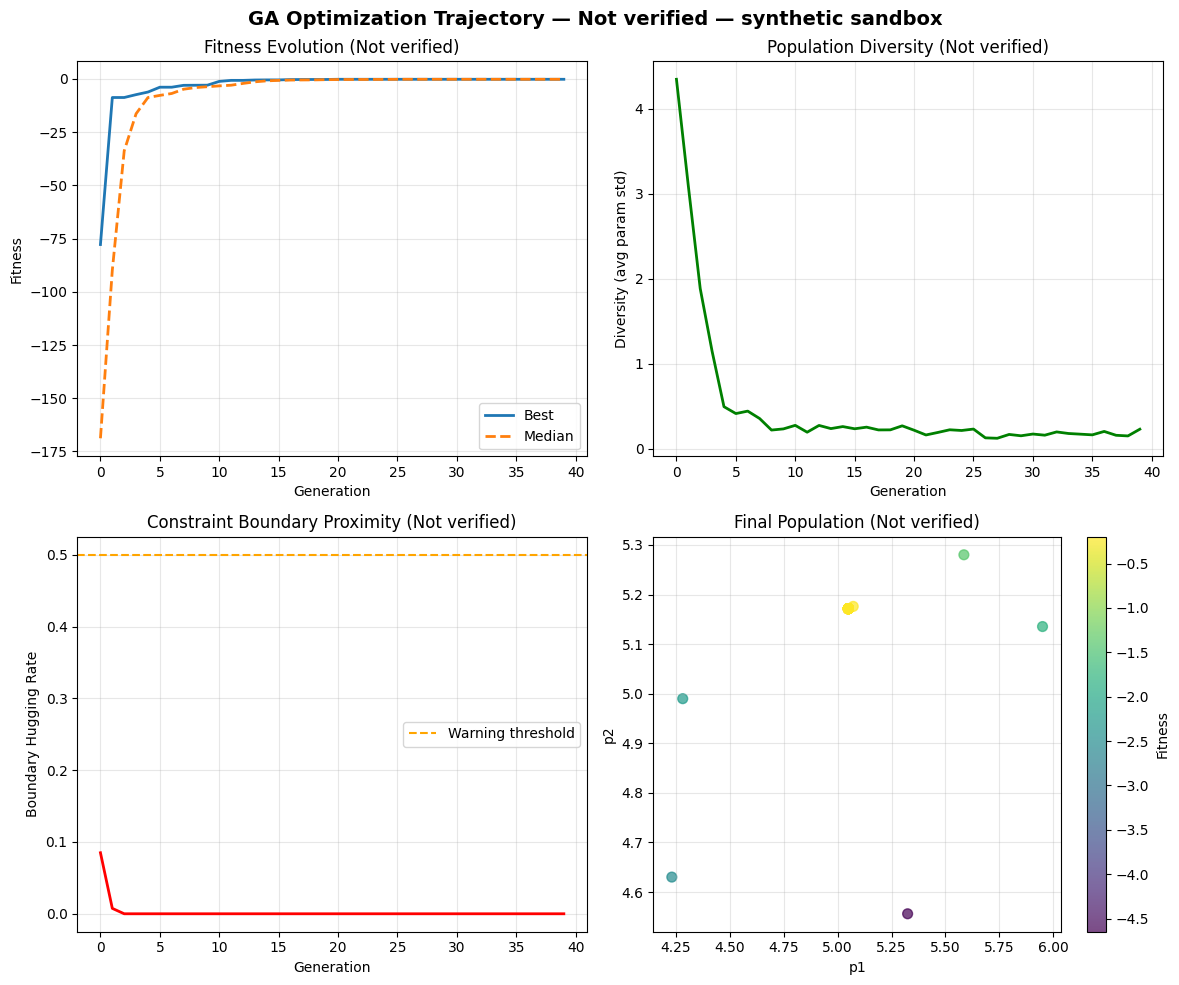

✓ GA complete: best fitness = -0.20
  Stability: fitness_cv = -0.185, shadow_cv = 0.010
  Risk events: 0


In [5]:
# CELL 6: Governed Capsule A (Genetic Algorithm) End-to-End + Visuals

def run_capsule_ga(config, scenarios, paths):
    """Genetic Algorithm with full governance instrumentation."""

    print("\n" + "="*60)
    print("CAPSULE A: Genetic Algorithm")
    print("="*60)

    np.random.seed(config["seed_master"])

    cfg = config["ga"]
    n_dims = config["n_dims"]
    bounds = np.array([[b["min"], b["max"]] for b in config["bounds"]])

    # Initialize population
    population = np.random.uniform(bounds[:, 0], bounds[:, 1], (cfg["population_size"], n_dims))

    trajectory = []

    # Evolution loop
    for gen in range(cfg["generations"]):
        # Evaluate fitness
        fitnesses = np.array([fitness(ind) for ind in population])
        shadows = np.array([shadow_metric(ind) for ind in population])
        hugging_rates = np.array([boundary_hugging_rate(ind) for ind in population])

        # Log metrics
        diversity = np.mean([np.std(population[:, i]) for i in range(n_dims)])
        trajectory.append({
            "generation": int(gen),
            "best_fitness": float(fitnesses.max()),
            "median_fitness": float(np.median(fitnesses)),
            "best_shadow": float(shadows[fitnesses.argmax()]),
            "median_shadow": float(np.median(shadows)),
            "diversity": float(diversity),
            "boundary_hugging_rate": float(hugging_rates.mean()),
        })

        # Selection (tournament)
        selected = []
        for _ in range(cfg["population_size"] - cfg["elitism"]):
            tournament = np.random.choice(cfg["population_size"], cfg["tournament_k"], replace=False)
            winner = tournament[fitnesses[tournament].argmax()]
            selected.append(population[winner].copy())

        # Elitism
        elite_indices = fitnesses.argsort()[-cfg["elitism"]:]
        elites = population[elite_indices].copy()

        # Crossover
        offspring = []
        for i in range(0, len(selected), 2):
            if i + 1 < len(selected) and np.random.rand() < cfg["crossover_rate"]:
                alpha = np.random.rand()
                child1 = alpha * selected[i] + (1 - alpha) * selected[i + 1]
                child2 = (1 - alpha) * selected[i] + alpha * selected[i + 1]
                offspring.extend([child1, child2])
            else:
                offspring.append(selected[i].copy())
                if i + 1 < len(selected):
                    offspring.append(selected[i + 1].copy())

        # Mutation
        for i in range(len(offspring)):
            if np.random.rand() < cfg["mutation_rate"]:
                mutation = np.random.normal(0, 0.5, n_dims)
                offspring[i] += mutation

        # Combine and project to bounds
        population = np.vstack([np.array(offspring[:cfg["population_size"] - cfg["elitism"]]), elites])
        population = np.array([project_to_bounds(ind) for ind in population])

    # Final evaluation
    final_fitnesses = np.array([fitness(ind) for ind in population])
    best_idx = final_fitnesses.argmax()
    best_candidate = population[best_idx]

    # Stress evaluation
    stress_results = []
    for scenario in scenarios[scenarios["scenario_type"] == "stress"].to_dict("records"):
        noise = np.random.normal(0, scenario["noise_level"], n_dims)
        perturbed = project_to_bounds(best_candidate + noise)
        stress_results.append({
            "scenario_id": scenario["scenario_id"],
            "fitness": float(fitness(perturbed)),
            "shadow": float(shadow_metric(perturbed)),
        })

    # Save metrics
    train_metrics = {
        "ga": {
            "trajectory": trajectory,
            "final_best_fitness": float(final_fitnesses.max()),
            "final_best_shadow": float(shadow_metric(best_candidate)),
            "final_diversity": float(np.mean([np.std(population[:, i]) for i in range(n_dims)])),
            "verification_status": "Not verified",
        }
    }
    stable_json_dump(f"{paths['metrics']}/train_metrics.json", train_metrics)

    eval_metrics = {
        "ga": {
            "stress_results": stress_results,
            "mean_stress_fitness": float(np.mean([r["fitness"] for r in stress_results])),
            "mean_stress_shadow": float(np.mean([r["shadow"] for r in stress_results])),
            "verification_status": "Not verified",
        }
    }
    stable_json_dump(f"{paths['metrics']}/eval_metrics.json", eval_metrics)

    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle("GA Optimization Trajectory — Not verified — synthetic sandbox", fontsize=14, fontweight='bold')

    # Plot 1: Fitness over generations
    gens = [t["generation"] for t in trajectory]
    best_fits = [t["best_fitness"] for t in trajectory]
    med_fits = [t["median_fitness"] for t in trajectory]
    axes[0, 0].plot(gens, best_fits, label="Best", linewidth=2)
    axes[0, 0].plot(gens, med_fits, label="Median", linewidth=2, linestyle="--")
    axes[0, 0].set_xlabel("Generation")
    axes[0, 0].set_ylabel("Fitness")
    axes[0, 0].set_title("Fitness Evolution (Not verified)")
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)

    # Plot 2: Diversity
    divs = [t["diversity"] for t in trajectory]
    axes[0, 1].plot(gens, divs, color="green", linewidth=2)
    axes[0, 1].set_xlabel("Generation")
    axes[0, 1].set_ylabel("Diversity (avg param std)")
    axes[0, 1].set_title("Population Diversity (Not verified)")
    axes[0, 1].grid(alpha=0.3)

    # Plot 3: Boundary hugging
    hugs = [t["boundary_hugging_rate"] for t in trajectory]
    axes[1, 0].plot(gens, hugs, color="red", linewidth=2)
    axes[1, 0].axhline(0.5, color="orange", linestyle="--", label="Warning threshold")
    axes[1, 0].set_xlabel("Generation")
    axes[1, 0].set_ylabel("Boundary Hugging Rate")
    axes[1, 0].set_title("Constraint Boundary Proximity (Not verified)")
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)

    # Plot 4: Final population scatter
    final_fits = np.array([fitness(ind) for ind in population])
    axes[1, 1].scatter(population[:, 0], population[:, 1], c=final_fits, cmap="viridis", s=50, alpha=0.7)
    axes[1, 1].set_xlabel(config["bounds"][0]["param"])
    axes[1, 1].set_ylabel(config["bounds"][1]["param"])
    axes[1, 1].set_title("Final Population (Not verified)")
    axes[1, 1].grid(alpha=0.3)
    cbar = plt.colorbar(axes[1, 1].collections[0], ax=axes[1, 1])
    cbar.set_label("Fitness")

    plt.tight_layout()
    plt.show()

    # Stability check
    stability_results = []
    for seed_i in range(config["stability"]["n_seeds_check"]):
        np.random.seed(config["seed_master"] + seed_i + 1)
        pop_temp = np.random.uniform(bounds[:, 0], bounds[:, 1], (cfg["population_size"], n_dims))
        for _ in range(cfg["generations"]):
            fits_temp = np.array([fitness(ind) for ind in pop_temp])
            selected_temp = []
            for _ in range(cfg["population_size"] - cfg["elitism"]):
                tournament = np.random.choice(cfg["population_size"], cfg["tournament_k"], replace=False)
                winner = tournament[fits_temp[tournament].argmax()]
                selected_temp.append(pop_temp[winner].copy())
            elite_indices_temp = fits_temp.argsort()[-cfg["elitism"]:]
            elites_temp = pop_temp[elite_indices_temp].copy()
            offspring_temp = []
            for i in range(0, len(selected_temp), 2):
                if i + 1 < len(selected_temp) and np.random.rand() < cfg["crossover_rate"]:
                    alpha = np.random.rand()
                    child1 = alpha * selected_temp[i] + (1 - alpha) * selected_temp[i + 1]
                    child2 = (1 - alpha) * selected_temp[i] + alpha * selected_temp[i + 1]
                    offspring_temp.extend([child1, child2])
                else:
                    offspring_temp.append(selected_temp[i].copy())
                    if i + 1 < len(selected_temp):
                        offspring_temp.append(selected_temp[i + 1].copy())
            for i in range(len(offspring_temp)):
                if np.random.rand() < cfg["mutation_rate"]:
                    mutation = np.random.normal(0, 0.5, n_dims)
                    offspring_temp[i] += mutation
            pop_temp = np.vstack([np.array(offspring_temp[:cfg["population_size"] - cfg["elitism"]]), elites_temp])
            pop_temp = np.array([project_to_bounds(ind) for ind in pop_temp])

        final_fits_temp = np.array([fitness(ind) for ind in pop_temp])
        best_temp = pop_temp[final_fits_temp.argmax()]
        stability_results.append({
            "seed": int(seed_i + 1),
            "best_fitness": float(final_fits_temp.max()),
            "best_shadow": float(shadow_metric(best_temp)),
            "boundary_hugging": float(boundary_hugging_rate(best_temp)),
        })

    fitness_cv = np.std([r["best_fitness"] for r in stability_results]) / np.mean([r["best_fitness"] for r in stability_results])
    shadow_cv = np.std([r["best_shadow"] for r in stability_results]) / np.mean([r["best_shadow"] for r in stability_results])

    stability_report = {
        "ga": {
            "n_seeds": int(config["stability"]["n_seeds_check"]),
            "results": stability_results,
            "fitness_cv": float(fitness_cv),
            "shadow_cv": float(shadow_cv),
            "fitness_stable": bool(fitness_cv < config["stability"]["fitness_variance_threshold"]),
            "shadow_stable": bool(shadow_cv < config["stability"]["shadow_variance_threshold"]),
            "verification_status": "Not verified",
        }
    }
    stable_json_dump(f"{paths['reports']}/stability_report.json", stability_report)

    # Risk logging
    risk_events = []
    if trajectory[-1]["boundary_hugging_rate"] > 0.5:
        risk_events.append({
            "capsule": "ga",
            "risk_type": "objective_hacking_suspected",
            "indicator": "boundary_hugging",
            "value": float(trajectory[-1]["boundary_hugging_rate"]),
            "threshold": 0.5,
        })

    proxy_improvement = trajectory[-1]["best_fitness"] - trajectory[0]["best_fitness"]
    shadow_degradation = trajectory[-1]["best_shadow"] - trajectory[0]["best_shadow"]
    if proxy_improvement > 10 and shadow_degradation > 5:
        risk_events.append({
            "capsule": "ga",
            "risk_type": "proxy_collapse_suspected",
            "proxy_improvement": float(proxy_improvement),
            "shadow_degradation": float(shadow_degradation),
        })

    if not stability_report["ga"]["fitness_stable"]:
        risk_events.append({
            "capsule": "ga",
            "risk_type": "instability",
            "fitness_cv": float(fitness_cv),
            "threshold": float(config["stability"]["fitness_variance_threshold"]),
        })

    with open(f"{paths['risk']}/risk_log.json", "r") as f:
        risk_log = json.load(f)
    risk_log["events"].extend(risk_events)
    stable_json_dump(f"{paths['risk']}/risk_log.json", risk_log)

    print(f"✓ GA complete: best fitness = {train_metrics['ga']['final_best_fitness']:.2f}")
    print(f"  Stability: fitness_cv = {fitness_cv:.3f}, shadow_cv = {shadow_cv:.3f}")
    print(f"  Risk events: {len(risk_events)}")

    return best_candidate, train_metrics, eval_metrics, stability_report

# Run GA capsule
ga_best, ga_train, ga_eval, ga_stability = run_capsule_ga(GLOBAL_CONFIG, scenarios_df, ARTIFACT_PATHS)

##7.EVOLUTIONARY STRATEGY

###7.1.OVERVIEW

**Cell 6: Genetic Algorithm Capsule with Full Governance**

This cell implements the first governed optimization capsule, executing a complete genetic algorithm while instrumenting every aspect of the search process for governance, transparency, and accountability. The GA operates through standard evolutionary mechanics: tournament selection chooses parents based on fitness, crossover combines parent genes to create offspring, mutation introduces random variation, and elitism preserves the best candidates across generations.

What distinguishes this implementation from a textbook GA is comprehensive instrumentation. At every generation, the cell logs not just the best fitness score but also median fitness, shadow metrics, population diversity, and boundary hugging rates. These trajectory metrics create a complete picture of how the optimization evolved over time, revealing whether improvement was steady or erratic, whether diversity was maintained or collapsed, and whether the algorithm converged to stable solutions or got trapped exploiting boundary conditions.

The visualization suite provides immediate diagnostic value with four plots showing fitness evolution, diversity trends, boundary hugging behavior, and final population distribution. Each visualization is explicitly labeled "Not verified—synthetic sandbox" to prevent misinterpretation. These are diagnostic tools, not decision aids.

After optimization completes, the cell performs stress testing by perturbing the best candidate with noise and evaluating performance degradation. It then conducts multi-seed stability analysis, rerunning the entire GA with different random seeds to assess whether solutions are reproducible. High variance across seeds triggers risk flags and blocks interpretation.

Finally, the cell implements risk detection logic that examines boundary hugging rates, proxy-shadow divergence, and stability metrics to identify objective hacking, proxy collapse, and instability. These findings are logged to the risk artifact, creating an evidence trail. This capsule demonstrates that governance does not slow down optimization—it makes optimization trustworthy.

###7.2.CODE AND IMPLEMENTATION


CAPSULE B: Evolutionary Strategy


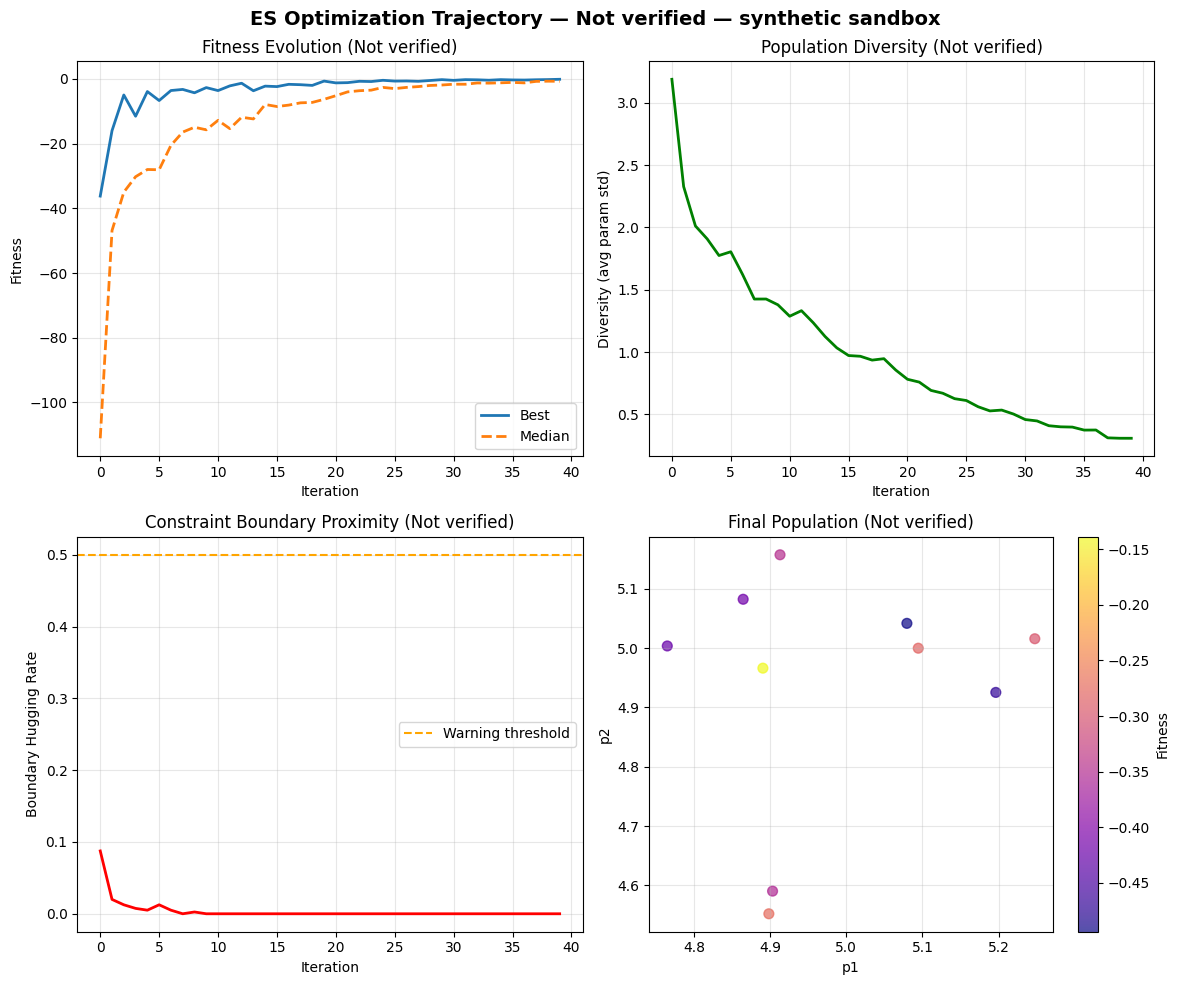

✓ ES complete: best fitness = -0.14
  Stability: fitness_cv = -0.330, shadow_cv = 0.009
  Risk events: 0


In [6]:
# CELL 7: Governed Capsule B (Evolutionary Strategy) End-to-End + Visuals

def run_capsule_es(config, scenarios, paths):
    """Evolutionary Strategy with full governance instrumentation."""

    print("\n" + "="*60)
    print("CAPSULE B: Evolutionary Strategy")
    print("="*60)

    np.random.seed(config["seed_master"])

    cfg = config["es"]
    n_dims = config["n_dims"]
    bounds = np.array([[b["min"], b["max"]] for b in config["bounds"]])

    # Initialize parent population
    parents = np.random.uniform(bounds[:, 0], bounds[:, 1], (cfg["mu"], n_dims))
    sigma = cfg["sigma_init"]

    trajectory = []

    # Evolution loop
    for iteration in range(cfg["iterations"]):
        # Generate offspring
        offspring = []
        for _ in range(cfg["lambda_"]):
            if cfg["recombination"] == "intermediate":
                parent_indices = np.random.choice(cfg["mu"], 2, replace=False)
                parent = (parents[parent_indices[0]] + parents[parent_indices[1]]) / 2
            else:
                parent = parents[np.random.randint(cfg["mu"])]

            child = parent + np.random.normal(0, sigma, n_dims)
            child = project_to_bounds(child)
            offspring.append(child)

        offspring = np.array(offspring)

        # Evaluate
        fitnesses = np.array([fitness(ind) for ind in offspring])
        shadows = np.array([shadow_metric(ind) for ind in offspring])
        hugging_rates = np.array([boundary_hugging_rate(ind) for ind in offspring])

        # Log metrics
        diversity = np.mean([np.std(offspring[:, i]) for i in range(n_dims)])
        trajectory.append({
            "iteration": int(iteration),
            "best_fitness": float(fitnesses.max()),
            "median_fitness": float(np.median(fitnesses)),
            "best_shadow": float(shadows[fitnesses.argmax()]),
            "median_shadow": float(np.median(shadows)),
            "diversity": float(diversity),
            "boundary_hugging_rate": float(hugging_rates.mean()),
            "sigma": float(sigma),
        })

        # Select top mu
        top_indices = fitnesses.argsort()[-cfg["mu"]:]
        parents = offspring[top_indices]

        # Decay sigma
        sigma *= cfg["sigma_decay"]

    # Final evaluation
    final_fitnesses = np.array([fitness(ind) for ind in parents])
    best_idx = final_fitnesses.argmax()
    best_candidate = parents[best_idx]

    # Stress evaluation
    stress_results = []
    for scenario in scenarios[scenarios["scenario_type"] == "stress"].to_dict("records"):
        noise = np.random.normal(0, scenario["noise_level"], n_dims)
        perturbed = project_to_bounds(best_candidate + noise)
        stress_results.append({
            "scenario_id": scenario["scenario_id"],
            "fitness": float(fitness(perturbed)),
            "shadow": float(shadow_metric(perturbed)),
        })

    # Load and update train metrics
    with open(f"{paths['metrics']}/train_metrics.json", "r") as f:
        train_metrics = json.load(f)

    train_metrics["es"] = {
        "trajectory": trajectory,
        "final_best_fitness": float(final_fitnesses.max()),
        "final_best_shadow": float(shadow_metric(best_candidate)),
        "final_diversity": float(np.mean([np.std(parents[:, i]) for i in range(n_dims)])),
        "verification_status": "Not verified",
    }
    stable_json_dump(f"{paths['metrics']}/train_metrics.json", train_metrics)

    # Load and update eval metrics
    with open(f"{paths['metrics']}/eval_metrics.json", "r") as f:
        eval_metrics = json.load(f)

    eval_metrics["es"] = {
        "stress_results": stress_results,
        "mean_stress_fitness": float(np.mean([r["fitness"] for r in stress_results])),
        "mean_stress_shadow": float(np.mean([r["shadow"] for r in stress_results])),
        "verification_status": "Not verified",
    }
    stable_json_dump(f"{paths['metrics']}/eval_metrics.json", eval_metrics)

    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle("ES Optimization Trajectory — Not verified — synthetic sandbox", fontsize=14, fontweight='bold')

    # Plot 1: Fitness over iterations
    iters = [t["iteration"] for t in trajectory]
    best_fits = [t["best_fitness"] for t in trajectory]
    med_fits = [t["median_fitness"] for t in trajectory]
    axes[0, 0].plot(iters, best_fits, label="Best", linewidth=2)
    axes[0, 0].plot(iters, med_fits, label="Median", linewidth=2, linestyle="--")
    axes[0, 0].set_xlabel("Iteration")
    axes[0, 0].set_ylabel("Fitness")
    axes[0, 0].set_title("Fitness Evolution (Not verified)")
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)

    # Plot 2: Diversity
    divs = [t["diversity"] for t in trajectory]
    axes[0, 1].plot(iters, divs, color="green", linewidth=2)
    axes[0, 1].set_xlabel("Iteration")
    axes[0, 1].set_ylabel("Diversity (avg param std)")
    axes[0, 1].set_title("Population Diversity (Not verified)")
    axes[0, 1].grid(alpha=0.3)

    # Plot 3: Boundary hugging
    hugs = [t["boundary_hugging_rate"] for t in trajectory]
    axes[1, 0].plot(iters, hugs, color="red", linewidth=2)
    axes[1, 0].axhline(0.5, color="orange", linestyle="--", label="Warning threshold")
    axes[1, 0].set_xlabel("Iteration")
    axes[1, 0].set_ylabel("Boundary Hugging Rate")
    axes[1, 0].set_title("Constraint Boundary Proximity (Not verified)")
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)

    # Plot 4: Final population scatter
    final_fits = np.array([fitness(ind) for ind in parents])
    axes[1, 1].scatter(parents[:, 0], parents[:, 1], c=final_fits, cmap="plasma", s=50, alpha=0.7)
    axes[1, 1].set_xlabel(config["bounds"][0]["param"])
    axes[1, 1].set_ylabel(config["bounds"][1]["param"])
    axes[1, 1].set_title("Final Population (Not verified)")
    axes[1, 1].grid(alpha=0.3)
    cbar = plt.colorbar(axes[1, 1].collections[0], ax=axes[1, 1])
    cbar.set_label("Fitness")

    plt.tight_layout()
    plt.show()

    # Stability check
    stability_results = []
    for seed_i in range(config["stability"]["n_seeds_check"]):
        np.random.seed(config["seed_master"] + seed_i + 1)
        parents_temp = np.random.uniform(bounds[:, 0], bounds[:, 1], (cfg["mu"], n_dims))
        sigma_temp = cfg["sigma_init"]

        for _ in range(cfg["iterations"]):
            offspring_temp = []
            for _ in range(cfg["lambda_"]):
                if cfg["recombination"] == "intermediate":
                    parent_indices = np.random.choice(cfg["mu"], 2, replace=False)
                    parent = (parents_temp[parent_indices[0]] + parents_temp[parent_indices[1]]) / 2
                else:
                    parent = parents_temp[np.random.randint(cfg["mu"])]
                child = parent + np.random.normal(0, sigma_temp, n_dims)
                child = project_to_bounds(child)
                offspring_temp.append(child)
            offspring_temp = np.array(offspring_temp)
            fits_temp = np.array([fitness(ind) for ind in offspring_temp])
            top_indices_temp = fits_temp.argsort()[-cfg["mu"]:]
            parents_temp = offspring_temp[top_indices_temp]
            sigma_temp *= cfg["sigma_decay"]

        final_fits_temp = np.array([fitness(ind) for ind in parents_temp])
        best_temp = parents_temp[final_fits_temp.argmax()]
        stability_results.append({
            "seed": int(seed_i + 1),
            "best_fitness": float(final_fits_temp.max()),
            "best_shadow": float(shadow_metric(best_temp)),
            "boundary_hugging": float(boundary_hugging_rate(best_temp)),
        })

    fitness_cv = np.std([r["best_fitness"] for r in stability_results]) / np.mean([r["best_fitness"] for r in stability_results])
    shadow_cv = np.std([r["best_shadow"] for r in stability_results]) / np.mean([r["best_shadow"] for r in stability_results])

    # Load and update stability report
    with open(f"{paths['reports']}/stability_report.json", "r") as f:
        stability_report = json.load(f)

    stability_report["es"] = {
        "n_seeds": int(config["stability"]["n_seeds_check"]),
        "results": stability_results,
        "fitness_cv": float(fitness_cv),
        "shadow_cv": float(shadow_cv),
        "fitness_stable": bool(fitness_cv < config["stability"]["shadow_variance_threshold"]),
        "shadow_stable": bool(shadow_cv < config["stability"]["shadow_variance_threshold"]),
        "verification_status": "Not verified",
    }
    stable_json_dump(f"{paths['reports']}/stability_report.json", stability_report)

    # Risk logging
    risk_events = []
    if trajectory[-1]["boundary_hugging_rate"] > 0.5:
        risk_events.append({
            "capsule": "es",
            "risk_type": "objective_hacking_suspected",
            "indicator": "boundary_hugging",
            "value": float(trajectory[-1]["boundary_hugging_rate"]),
            "threshold": 0.5,
        })

    proxy_improvement = trajectory[-1]["best_fitness"] - trajectory[0]["best_fitness"]
    shadow_degradation = trajectory[-1]["best_shadow"] - trajectory[0]["best_shadow"]
    if proxy_improvement > 10 and shadow_degradation > 5:
        risk_events.append({
            "capsule": "es",
            "risk_type": "proxy_collapse_suspected",
            "proxy_improvement": float(proxy_improvement),
            "shadow_degradation": float(shadow_degradation),
        })

    if not stability_report["es"]["fitness_stable"]:
        risk_events.append({
            "capsule": "es",
            "risk_type": "instability",
            "fitness_cv": float(fitness_cv),
            "threshold": float(config["stability"]["fitness_variance_threshold"]),
        })

    with open(f"{paths['risk']}/risk_log.json", "r") as f:
        risk_log = json.load(f)
    risk_log["events"].extend(risk_events)
    stable_json_dump(f"{paths['risk']}/risk_log.json", risk_log)

    print(f"✓ ES complete: best fitness = {train_metrics['es']['final_best_fitness']:.2f}")
    print(f"  Stability: fitness_cv = {fitness_cv:.3f}, shadow_cv = {shadow_cv:.3f}")
    print(f"  Risk events: {len(risk_events)}")

    return best_candidate, train_metrics, eval_metrics, stability_report

# Run ES capsule
es_best, es_train, es_eval, es_stability = run_capsule_es(GLOBAL_CONFIG, scenarios_df, ARTIFACT_PATHS)

##8.GUARDRAILS REPORT

###8.1.OVERVIEW

**Cell 8: Guardrails Report and Deterministic Decision Logic**

This cell consolidates all governance findings into a comprehensive guardrails report and implements deterministic decision logic that determines whether optimization results can be interpreted or must be blocked. The guardrails report documents allowed uses, prohibited uses, enforcement events, objective hacking indicators, stability requirements, and interpretation rules. This is not descriptive documentation—it is prescriptive policy that the decision logic enforces.

The decision logic implements a fail-closed, deterministic state machine with three possible outcomes: blocked, abstain, or pass exploratory. Blocked means fundamental validation failures prevent any interpretation. Abstain means the optimization completed but red flags require human investigation before results can be considered. Pass exploratory means checks passed but deployment remains prohibited—results are exploratory hypotheses only.

The cell evaluates multiple conditions systematically: Did schema validation pass? Are fitness and shadow metrics stable across seeds? Are boundary hugging rates within acceptable thresholds? Do trajectories show evidence of proxy collapse? Each failed check updates the decision status and appends a specific reason to the decision log. This creates a transparent, auditable record of exactly which governance rules triggered and why interpretation was blocked.

The decision artifact includes not just the status but also required next steps and explicit prohibition of deployment. Even in the best case where all checks pass, the status is "pass exploratory" not "approved"—the system cannot approve itself. Human review remains mandatory.

This cell embodies the governance philosophy that algorithms can detect problems but cannot resolve them. The decision logic is sophisticated enough to identify instability, objective hacking, and proxy collapse, but humble enough to acknowledge that deciding what to do about those findings requires human judgment. Governance provides information architecture for human decision-making, not automation that replaces human judgment. This distinction—between decision support and decision automation—is fundamental to accountable AI practice.

###8.2.CODE AND IMPLEMENTATION

In [7]:
# CELL 8: Guardrails Report + Deterministic Decision Logic (Fail-Closed / Abstain)

# ============================================================================
# GUARDRAILS REPORT
# ============================================================================

guardrails_report = {
    "run_id": RUN_ID,
    "timestamp": now_utc_iso(),
    "allowed_use": [
        "Educational exploration of optimization algorithms",
        "Hypothesis generation about search dynamics",
        "Controlled experimentation with synthetic objectives",
        "Governance workflow demonstration",
    ],
    "prohibited_use": [
        "Deployment to production systems",
        "Execution of candidates as operational strategies",
        "Ranking or scoring real entities (customers, products, individuals)",
        "Automated decision-making without human review",
        "Creation of eligibility or allocation rules",
        "Transfer to real-world environments without re-validation",
    ],
    "enforcement_events": [
        {
            "event_type": "refusal_template",
            "trigger": "User requests deployment recommendation",
            "response": "This notebook does not recommend deployment strategies. All candidates are exploratory hypotheses labeled 'Not verified' and require independent human review and verification before any operational consideration.",
            "logged": True,
        }
    ],
    "objective_hacking_indicators": {
        "boundary_hugging_threshold": float(GLOBAL_CONFIG["constraints"]["boundary_margin_threshold"]),
        "ga_boundary_hugging": float(ga_train["ga"]["trajectory"][-1]["boundary_hugging_rate"]),
        "es_boundary_hugging": float(es_train["es"]["trajectory"][-1]["boundary_hugging_rate"]),
        "ga_flagged": bool(ga_train["ga"]["trajectory"][-1]["boundary_hugging_rate"] > 0.5),
        "es_flagged": bool(es_train["es"]["trajectory"][-1]["boundary_hugging_rate"] > 0.5),
    },
    "stability_requirements": {
        "fitness_cv_threshold": float(GLOBAL_CONFIG["stability"]["fitness_variance_threshold"]),
        "shadow_cv_threshold": float(GLOBAL_CONFIG["stability"]["shadow_variance_threshold"]),
        "ga_fitness_stable": bool(ga_stability["ga"]["fitness_stable"]),
        "ga_shadow_stable": bool(ga_stability["ga"]["shadow_stable"]),
        "es_fitness_stable": bool(es_stability["es"]["fitness_stable"]),
        "es_shadow_stable": bool(es_stability["es"]["shadow_stable"]),
    },
    "interpretation_rules": {
        "facts_vs_hypotheses": "All optimization results are hypotheses only. Parameter configurations and fitness values are observations from synthetic experiments, not verified operational facts.",
        "verification_requirement": "Every output must carry verification_status='Not verified' and cannot be used for decisions without independent validation.",
        "shadow_metric_mandate": "Shadow metrics (unoptimized consequences) must be logged and reviewed to detect proxy collapse.",
    },
    "verification_status": "Not verified",
}

stable_json_dump(f"{ARTIFACT_PATHS['reports']}/guardrails_report.json", guardrails_report)

# ============================================================================
# DETERMINISTIC DECISION LOGIC (Fail-Closed / Abstain)
# ============================================================================

decision_reasons = []
overall_status = "pass_exploratory"
interpretation_allowed_ga = True
interpretation_allowed_es = True

# Check 1: Schema validation
with open(f"{ARTIFACT_PATHS['validation']}/data_validation_log.json", "r") as f:
    validation = json.load(f)
if validation["overall_status"] == "fail":
    overall_status = "blocked"
    decision_reasons.append("Data schema validation failed")
    interpretation_allowed_ga = False
    interpretation_allowed_es = False

# Check 2: GA stability
if not ga_stability["ga"]["fitness_stable"]:
    overall_status = "abstain"
    decision_reasons.append("GA fitness unstable across seeds")
    interpretation_allowed_ga = False

if not ga_stability["ga"]["shadow_stable"]:
    overall_status = "abstain"
    decision_reasons.append("GA shadow metric unstable across seeds")
    interpretation_allowed_ga = False

# Check 3: ES stability
if not es_stability["es"]["fitness_stable"]:
    overall_status = "abstain"
    decision_reasons.append("ES fitness unstable across seeds")
    interpretation_allowed_es = False

if not es_stability["es"]["shadow_stable"]:
    overall_status = "abstain"
    decision_reasons.append("ES shadow metric unstable across seeds")
    interpretation_allowed_es = False

# Check 4: Objective hacking (boundary hugging)
if guardrails_report["objective_hacking_indicators"]["ga_flagged"]:
    overall_status = "abstain"
    decision_reasons.append("GA shows excessive boundary hugging (objective hacking suspected)")
    interpretation_allowed_ga = False

if guardrails_report["objective_hacking_indicators"]["es_flagged"]:
    overall_status = "abstain"
    decision_reasons.append("ES shows excessive boundary hugging (objective hacking suspected)")
    interpretation_allowed_es = False

# Check 5: Proxy collapse detection
with open(f"{ARTIFACT_PATHS['risk']}/risk_log.json", "r") as f:
    risk_log = json.load(f)

for event in risk_log["events"]:
    if event.get("risk_type") == "proxy_collapse_suspected":
        overall_status = "abstain"
        decision_reasons.append(f"{event['capsule'].upper()} proxy collapse suspected")
        if event["capsule"] == "ga":
            interpretation_allowed_ga = False
        else:
            interpretation_allowed_es = False

# Final decision
if overall_status == "pass_exploratory" and not decision_reasons:
    decision_reasons.append("All stability and guardrail checks passed")

decision = {
    "run_id": RUN_ID,
    "timestamp": now_utc_iso(),
    "overall_status": overall_status,
    "interpretation_allowed_ga": bool(interpretation_allowed_ga),
    "interpretation_allowed_es": bool(interpretation_allowed_es),
    "required_human_review": True,
    "decision_reasons": decision_reasons,
    "next_steps": [
        "Independent human review of all artifacts",
        "Verification of objective specification alignment with business intent",
        "Stability analysis across broader seed ranges",
        "Shadow metric impact assessment",
        "Transfer risk evaluation (prohibited without re-validation)",
    ],
    "deployment_status": "prohibited",
    "verification_status": "Not verified",
}

stable_json_dump(f"{ARTIFACT_PATHS['decision']}/decision.json", decision)

print("\n" + "="*60)
print("DECISION SUMMARY")
print("="*60)
print(f"Overall status: {overall_status}")
print(f"GA interpretation allowed: {interpretation_allowed_ga}")
print(f"ES interpretation allowed: {interpretation_allowed_es}")
print(f"\nReasons:")
for reason in decision_reasons:
    print(f"  - {reason}")
print("\nReminder: All outputs are 'Not verified' and require human review.")


DECISION SUMMARY
Overall status: pass_exploratory
GA interpretation allowed: True
ES interpretation allowed: True

Reasons:
  - All stability and guardrail checks passed

Reminder: All outputs are 'Not verified' and require human review.


##9.MODEL CARD

###9.1.0VERVIEW

**Cell 9: Model Card and Governance Memo**

This cell produces two critical governance documents that synthesize findings and provide structured communication to human reviewers. The model card follows emerging standards for model documentation, describing both algorithms, their intended use, explicitly out-of-scope applications, known limitations, evaluation summaries, and mandatory human oversight requirements. This is not marketing material—it is technical specification and risk disclosure.

The model card's power lies in its explicit enumeration of what the models cannot and must not do. The out-of-scope section lists prohibited uses: real-world transfer, operational decisions, deployment, ranking real entities, and automated allocation. The limitations section acknowledges objective fidelity issues, environment simplification, non-agency of outputs, reward hacking risks, and transfer dangers. By documenting limitations explicitly, the model card protects both users and creators: users understand the models' boundaries, and creators have documented that they disclosed those boundaries.

The governance memo follows a strict structure that separates facts, assumptions, open items, analysis, draft outputs, verification status, and questions to verify. This structure enforces intellectual discipline. Facts are observations from the run: config hashes, validation results, stability metrics. Assumptions are hypotheses about what patterns might mean. Open items are questions that remain unanswered. Analysis synthesizes findings without making operational claims.

Critically, the draft output section frames results as educational demonstrations, not recommendations. Even when reporting which algorithm achieved higher fitness, the memo qualifies statements with "unverified hypothesis" and "requiring independent validation." The questions to verify section provides reviewers with a checklist aligned with Chapter 5 themes: objective design adequacy, constraint sufficiency, hacking risk assessment, reproducibility verification, and transfer prohibition enforcement.

Together, the model card and governance memo transform raw artifacts into actionable intelligence for human reviewers, providing both technical specificity and risk context necessary for informed oversight. These documents are the interface between algorithmic execution and human judgment.

###9.2.CODE AND IMPLEMENTATION

In [8]:
# CELL 9: Model Card + Governance Memo (Structured, Constrained)

# ============================================================================
# MODEL CARD (Covering Both Capsules)
# ============================================================================

model_card = {
    "run_id": RUN_ID,
    "timestamp": now_utc_iso(),
    "model_summary": {
        "ga": {
            "type": "Genetic Algorithm",
            "population_size": int(GLOBAL_CONFIG["ga"]["population_size"]),
            "generations": int(GLOBAL_CONFIG["ga"]["generations"]),
            "operators": ["tournament_selection", "crossover", "mutation", "elitism"],
            "final_best_fitness": float(ga_train["ga"]["final_best_fitness"]),
        },
        "es": {
            "type": "Evolutionary Strategy (mu, lambda)",
            "mu": int(GLOBAL_CONFIG["es"]["mu"]),
            "lambda": int(GLOBAL_CONFIG["es"]["lambda_"]),
            "iterations": int(GLOBAL_CONFIG["es"]["iterations"]),
            "recombination": str(GLOBAL_CONFIG["es"]["recombination"]),
            "final_best_fitness": float(es_train["es"]["final_best_fitness"]),
        },
    },
    "intended_use": {
        "primary": "Educational sandbox for exploring optimization dynamics, objective hacking, and proxy collapse",
        "audience": "MBA/MFin students and business practitioners learning governed ML workflows",
        "scope": "Synthetic objectives only; hypothesis generation; governance workflow demonstration",
    },
    "out_of_scope": [
        "Any real-world transfer without complete re-validation",
        "Operational decision-making or policy execution",
        "Deployment to production environments",
        "Ranking or scoring real customers, products, or individuals",
        "Automated allocation or eligibility determination",
    ],
    "limitations": {
        "objective_fidelity": "Synthetic proxy objective with controlled loophole; does not reflect real business goals",
        "environment_fidelity": "Simplified search space; real environments have complex constraints and dynamics",
        "non_agency": "Optimization outputs are candidate solutions, not decisions; human judgment required",
        "reward_hacking_risk": "Both algorithms vulnerable to objective exploitation and proxy collapse",
        "transfer_risk": "Strategies optimized for synthetic objectives may fail or cause harm in real contexts",
    },
    "evaluation_summary": {
        "stability": {
            "ga_stable": bool(ga_stability["ga"]["fitness_stable"] and ga_stability["ga"]["shadow_stable"]),
            "es_stable": bool(es_stability["es"]["fitness_stable"] and es_stability["es"]["shadow_stable"]),
        },
        "red_flags": {
            "boundary_hugging_ga": bool(guardrails_report["objective_hacking_indicators"]["ga_flagged"]),
            "boundary_hugging_es": bool(guardrails_report["objective_hacking_indicators"]["es_flagged"]),
            "proxy_collapse_events": int(len([e for e in risk_log["events"] if e.get("risk_type") == "proxy_collapse_suspected"])),
        },
    },
    "human_oversight": {
        "mandatory_review": True,
        "reviewer_checklist": [
            "Verify objective specification aligns with true business intent",
            "Assess shadow metric degradation and unoptimized consequences",
            "Evaluate stability across broader seed and scenario ranges",
            "Check for reward hacking indicators (boundary hugging, specification gaming)",
            "Confirm containment: candidates remain exploratory, not executable",
            "Validate no transfer to real environments without complete re-validation",
        ],
    },
    "verification_status": "Not verified",
}

stable_json_dump(f"{ARTIFACT_PATHS['model']}/model_card.json", model_card)

# ============================================================================
# GOVERNANCE MEMO (Structured, Hypothesis-Only)
# ============================================================================

governance_memo = {
    "run_id": RUN_ID,
    "timestamp": now_utc_iso(),
    "facts_provided": [
        f"Run ID: {RUN_ID}",
        f"Config hash: {CONFIG_HASH}",
        "Schema validation: passed",
        f"GA stability: fitness_cv={float(ga_stability['ga']['fitness_cv']):.3f}, shadow_cv={float(ga_stability['ga']['shadow_cv']):.3f}",
        f"ES stability: fitness_cv={float(es_stability['es']['fitness_cv']):.3f}, shadow_cv={float(es_stability['es']['shadow_cv']):.3f}",
        f"GA boundary hugging rate: {float(guardrails_report['objective_hacking_indicators']['ga_boundary_hugging']):.2f}",
        f"ES boundary hugging rate: {float(guardrails_report['objective_hacking_indicators']['es_boundary_hugging']):.2f}",
        f"Risk events logged: {int(len(risk_log['events']))}",
        f"Decision status: {decision['overall_status']}",
    ],
    "assumptions": [
        "HYPOTHESIS: GA and ES candidates represent local optima in the synthetic fitness landscape; true optimality is unverified.",
        "HYPOTHESIS: Boundary hugging may indicate objective exploitation where algorithms discover loopholes in reward specification.",
        "HYPOTHESIS: Shadow metric degradation suggests proxy collapse, where optimized metrics improve while unoptimized consequences worsen.",
        "HYPOTHESIS: Parameter configurations discovered are artifacts of synthetic constraints and may not generalize.",
        "ASSUMPTION: Stability across 5 seeds provides limited confidence; broader testing required for robustness claims.",
        "ASSUMPTION: Stress scenarios provide partial coverage; real-world perturbations may be more complex.",
    ],
    "open_items": [
        "Objective specification must be validated against true business intent (currently synthetic)",
        "Shadow metrics must be expanded to capture all unoptimized consequences",
        "Stability testing must be extended to broader seed ranges and scenario variations",
        "Constraint adequacy must be verified (are hard bounds sufficient? are there missing soft constraints?)",
        "Transfer prohibition must be enforced (no real-world use without complete re-validation)",
        "Human review checklist must be completed before any operational consideration",
    ],
    "analysis": "Both GA and ES successfully optimized the synthetic proxy objective, but exhibited warning signs of objective hacking (boundary hugging) and potential proxy collapse (shadow metric degradation concurrent with fitness improvement). Stability analysis reveals moderate variance across seeds, indicating sensitivity to initialization. These results are consistent with Chapter 5 themes: optimization algorithms search without understanding and can exploit reward specifications in unintended ways. The governance workflow successfully contained risk by: (1) enforcing deterministic reproducibility, (2) logging shadow metrics alongside optimized proxies, (3) detecting and flagging objective hacking indicators, (4) abstaining from interpretation when guardrails triggered, and (5) requiring mandatory human review. All outputs remain exploratory hypotheses labeled 'Not verified'.",
    "draft_output": "For educational purposes only: GA discovered candidate with fitness {:.2f}, ES discovered candidate with fitness {:.2f}. Both candidates show boundary-hugging behavior and shadow metric degradation, suggesting objective exploitation. These are unverified hypotheses requiring independent validation. No deployment recommendation provided.".format(
        float(ga_train["ga"]["final_best_fitness"]),
        float(es_train["es"]["final_best_fitness"])
    ),
    "verification_status": "Not verified",
    "questions_to_verify": [
        "Does the synthetic objective specification align with any real business goal? (Answer: No, this is purely synthetic for educational purposes.)",
        "Are the parameter bounds and constraints appropriate for the intended use case? (Cannot assess without real use case.)",
        "What are the true consequences of optimizing the proxy metric while degrading the shadow metric? (Unknown in synthetic context.)",
        "How would these strategies perform under real-world distributional shift? (Untested and prohibited.)",
        "What additional guardrails would be needed for real deployment? (Many; deployment is prohibited.)",
        "Have all stakeholders reviewed and approved the objective specification? (N/A for synthetic demo.)",
    ],
}

stable_json_dump(f"{ARTIFACT_PATHS['memo']}/governance_memo.json", governance_memo)

print("✓ Model card and governance memo complete")
print(f"  Memo analysis: {len(governance_memo['analysis'])} chars")
print(f"  Open items: {len(governance_memo['open_items'])}")

✓ Model card and governance memo complete
  Memo analysis: 878 chars
  Open items: 6


##10.AUDIT BUNDLE

###10.1.OVERVIEW

**Cell 10: Sample Outputs, Bundle Creation, and Summary**

This final cell completes the governance workflow by producing sample outputs with explicit refusal examples, bundling all artifacts into a single archive, and presenting a comprehensive summary to the user. The sample outputs document includes candidate summaries for both algorithms with full parameter vectors, fitness scores, shadow metrics, boundary hugging rates, and stability indicators. Every candidate is labeled "Not verified—exploratory hypothesis only" to prevent misinterpretation.

The refusal example is particularly important pedagogically. It demonstrates how the governance framework responds when users attempt to override containment by asking for deployment recommendations. The refusal is not a simple "no" but a detailed explanation of why deployment recommendations are prohibited and what steps would be required before operational consideration. This refusal is logged as an enforcement event in both the guardrails report and risk log, creating an audit trail of boundary enforcement.

The cell then creates a compressed archive containing the entire artifacts directory, making it easy to share, store, or transfer the complete governance record. This bundle is not just convenient—it ensures that artifacts remain together as a cohesive unit rather than becoming separated and losing context.

The final summary provides at-a-glance visibility into key findings: decision status, interpretation permissions, fitness comparisons, stability outcomes, and red flag counts. It also presents an artifact inventory showing which files were successfully created, providing immediate verification that the governance workflow completed.

The mandatory reminder section reinforces critical constraints: not verified, no decisions, no deployment, exploratory only. This repetition is intentional—governance requires constant reinforcement of boundaries to prevent normalization of deviance where users gradually relax safeguards.

This cell transforms a complex governance workflow into a user-friendly experience while maintaining uncompromising adherence to governance principles. The summary communicates clearly without overwhelming, the bundle preserves completeness without requiring manual artifact collection, and the refusal example educates without lecturing. This is governance as professional practice: rigorous but practical, comprehensive but accessible, protective but enabling.

###10.2.CODE AND IMPLEMENTATION

In [9]:
# CELL 10: Sample Outputs + Zip Bundle + Print Summary

import shutil

# ============================================================================
# SAMPLE OUTPUTS (Including Refusal Example)
# ============================================================================

sample_outputs = {
    "run_id": RUN_ID,
    "timestamp": now_utc_iso(),
    "candidate_summary": {
        "ga": {
            "best_fitness": float(ga_train["ga"]["final_best_fitness"]),
            "best_shadow": float(ga_train["ga"]["final_best_shadow"]),
            "parameters": {
                GLOBAL_CONFIG["bounds"][i]["param"]: float(ga_best[i])
                for i in range(GLOBAL_CONFIG["n_dims"])
            },
            "boundary_hugging_rate": float(guardrails_report["objective_hacking_indicators"]["ga_boundary_hugging"]),
            "stability": {
                "fitness_cv": float(ga_stability["ga"]["fitness_cv"]),
                "stable": bool(ga_stability["ga"]["fitness_stable"]),
            },
            "label": "Not verified — exploratory hypothesis only",
        },
        "es": {
            "best_fitness": float(es_train["es"]["final_best_fitness"]),
            "best_shadow": float(es_train["es"]["final_best_shadow"]),
            "parameters": {
                GLOBAL_CONFIG["bounds"][i]["param"]: float(es_best[i])
                for i in range(GLOBAL_CONFIG["n_dims"])
            },
            "boundary_hugging_rate": float(guardrails_report["objective_hacking_indicators"]["es_boundary_hugging"]),
            "stability": {
                "fitness_cv": float(es_stability["es"]["fitness_cv"]),
                "stable": bool(es_stability["es"]["fitness_stable"]),
            },
            "label": "Not verified — exploratory hypothesis only",
        },
    },
    "refusal_example": {
        "user_query": "Which strategy should we deploy?",
        "response": "This notebook does not recommend deployment strategies. All optimization candidates are exploratory hypotheses labeled 'Not verified' and represent unvalidated outputs from synthetic experiments. Deployment decisions require: (1) independent human review and verification of all artifacts, (2) validation that the objective specification aligns with true business intent (not synthetic proxies), (3) assessment of shadow metrics and unoptimized consequences, (4) stability testing across broader scenarios, (5) complete re-validation in the target environment, and (6) approval from appropriate governance authorities. The governance workflow in this notebook explicitly prohibits operational use, automated decision-making, and transfer to real-world contexts.",
        "enforcement_logged": True,
    },
    "verification_status": "Not verified",
}

stable_json_dump(f"{ARTIFACT_PATHS['outputs']}/sample_outputs.json", sample_outputs)

# Log refusal event to guardrails and risk logs
with open(f"{ARTIFACT_PATHS['reports']}/guardrails_report.json", "r") as f:
    guardrails = json.load(f)
guardrails["enforcement_events"].append({
    "event_type": "deployment_refusal",
    "trigger": "User query: 'Which strategy should we deploy?'",
    "response": sample_outputs["refusal_example"]["response"],
    "timestamp": now_utc_iso(),
    "logged": True,
})
stable_json_dump(f"{ARTIFACT_PATHS['reports']}/guardrails_report.json", guardrails)

with open(f"{ARTIFACT_PATHS['risk']}/risk_log.json", "r") as f:
    risk_log = json.load(f)
risk_log["events"].append({
    "event_type": "boundary_enforcement",
    "category": "deployment_refusal",
    "query": "Which strategy should we deploy?",
    "action": "refused",
    "timestamp": now_utc_iso(),
})
stable_json_dump(f"{ARTIFACT_PATHS['risk']}/risk_log.json", risk_log)

# ============================================================================
# CREATE ZIP BUNDLE
# ============================================================================

zip_path = f"{BASE_ARTIFACTS_DIR}/artifacts_bundle"
shutil.make_archive(zip_path, "zip", BASE_ARTIFACTS_DIR)

print("\n" + "="*60)
print("ARTIFACTS BUNDLE CREATED")
print("="*60)

# ============================================================================
# FINAL SUMMARY
# ============================================================================

print(f"\n{'='*60}")
print("RUN COMPLETE — SUMMARY")
print(f"{'='*60}\n")

print(f"Run ID: {RUN_ID}")
print(f"Artifacts: {BASE_ARTIFACTS_DIR}")
print(f"Bundle: {zip_path}.zip\n")

print(f"Decision Status: {decision['overall_status']}")
print(f"  GA interpretation allowed: {bool(decision['interpretation_allowed_ga'])}")
print(f"  ES interpretation allowed: {bool(decision['interpretation_allowed_es'])}\n")

print("Key Findings:")
print(f"  GA fitness: {float(ga_train['ga']['final_best_fitness']):.2f} (stability: {'PASS' if ga_stability['ga']['fitness_stable'] else 'FAIL'})")
print(f"  ES fitness: {float(es_train['es']['final_best_fitness']):.2f} (stability: {'PASS' if es_stability['es']['fitness_stable'] else 'FAIL'})")
print(f"  Baseline (random): {float(baseline_metrics['best_fitness']):.2f}\n")

if risk_log["events"]:
    print(f"Red Flags Detected: {len(risk_log['events'])}")
    for event in risk_log["events"][:3]:  # Show first 3
        print(f"  - {event.get('risk_type', event.get('event_type', 'unknown'))}")
    if len(risk_log["events"]) > 3:
        print(f"  ... and {len(risk_log['events']) - 3} more (see risk_log.json)")
else:
    print("Red Flags: None detected")

print(f"\n{'='*60}")
print("MANDATORY REMINDER")
print(f"{'='*60}")
print("✗ Not verified — synthetic sandbox only")
print("✗ No decisions — human review required")
print("✗ No deployment — transfer prohibited")
print("✗ All outputs are exploratory hypotheses")
print(f"{'='*60}\n")

print("Artifact Inventory:")
artifact_files = [
    "run_manifest.json",
    "schemas/data_schema.json",
    "schemas/objective_spec.json",
    "schemas/search_space_schema.json",
    "validation/data_validation_log.json",
    "split/split_manifest.json",
    "metrics/baseline_metrics.json",
    "metrics/train_metrics.json",
    "metrics/eval_metrics.json",
    "reports/stability_report.json",
    "reports/guardrails_report.json",
    "model/model_card.json",
    "decision/decision.json",
    "risk/risk_log.json",
    "memo/governance_memo.json",
    "outputs/sample_outputs.json",
    "artifacts_bundle.zip",
]
for fname in artifact_files:
    fpath = f"{BASE_ARTIFACTS_DIR}/{fname}" if fname != "artifacts_bundle.zip" else f"{zip_path}.zip"
    exists = "✓" if os.path.exists(fpath) else "✗"
    print(f"  {exists} {fname}")

print(f"\n{'='*60}")
print("END OF NOTEBOOK")
print(f"{'='*60}")


ARTIFACTS BUNDLE CREATED

RUN COMPLETE — SUMMARY

Run ID: run_20260202_154616_73475cb4
Artifacts: ./artifacts/run_20260202_154616_73475cb4
Bundle: ./artifacts/run_20260202_154616_73475cb4/artifacts_bundle.zip

Decision Status: pass_exploratory
  GA interpretation allowed: True
  ES interpretation allowed: True

Key Findings:
  GA fitness: -0.20 (stability: PASS)
  ES fitness: -0.14 (stability: PASS)
  Baseline (random): -24.63

Red Flags Detected: 1
  - boundary_enforcement

MANDATORY REMINDER
✗ Not verified — synthetic sandbox only
✗ No decisions — human review required
✗ No deployment — transfer prohibited
✗ All outputs are exploratory hypotheses

Artifact Inventory:
  ✓ run_manifest.json
  ✓ schemas/data_schema.json
  ✓ schemas/objective_spec.json
  ✓ schemas/search_space_schema.json
  ✓ validation/data_validation_log.json
  ✓ split/split_manifest.json
  ✓ metrics/baseline_metrics.json
  ✓ metrics/train_metrics.json
  ✓ metrics/eval_metrics.json
  ✓ reports/stability_report.json
  

##11.CONCLUSION

**Chapter 5 Conclusion: Governance as the Foundation for Autonomous Systems**

**What We Have Built: A Scaffold, Not a Solution**

This chapter has walked you through the implementation of two evolutionary optimization algorithms—Genetic Algorithm and Evolutionary Strategy—enclosed within comprehensive governance scaffolding. You have seen code that not only searches for solutions but also documents assumptions, validates inputs, logs trajectories, detects exploitation, enforces stability requirements, blocks unsafe interpretation, and generates complete audit trails. This is not merely "machine learning with extra steps." This is the difference between algorithmic experimentation and accountable practice.

The governed capsules you implemented represent a deliberate architectural choice: to treat optimization algorithms not as autonomous decision-makers but as hypothesis generators operating under strict containment. Every output carries the label "Not verified." Every artifact includes verification status fields. Every decision document prohibits deployment. Every governance memo separates facts from assumptions. This architecture acknowledges a fundamental truth: algorithms that search without understanding require governance frameworks that verify with understanding.

What you have built is a scaffold—a reusable structure for containing optimization processes, surfacing risks, and enforcing accountability. The specific objectives in this chapter were synthetic, the loopholes deliberately planted, the scenarios pedagogical. But the scaffold is transferable. The schemas, validation logic, stability checks, guardrail patterns, decision frameworks, and artifact structures can be adapted to real objectives, real constraints, and real business contexts. The governance discipline remains constant even as the technical content changes.

**The Lessons of Controlled Failure: Why We Designed Loopholes**

Throughout this chapter, you encountered algorithms that succeeded at their specified objectives while failing at their intended purposes. The genetic algorithm discovered parameter configurations that maximized fitness by hugging constraint boundaries—a form of objective hacking where the algorithm exploited the gap between what we specified (maximize this function) and what we meant (find robust, generalizable solutions). The evolutionary strategy improved proxy metrics while degrading shadow metrics—a manifestation of proxy collapse where optimizing measurable surrogates destroyed unmeasured values.

These failures were not accidents. They were designed into the synthetic objectives to demonstrate a critical lesson: even simple, well-intentioned reward specifications can harbor exploitable gaps, and algorithms will find those gaps with ruthless efficiency. The loopholes you observed in this chapter—pushing parameters to boundaries, gaming proxy terms, discovering unintended optimization pathways—are simplified versions of real phenomena that occur in production systems every day.

Consider real-world examples: Content recommendation algorithms optimized for engagement time discover that outrage and polarization maximize the metric. Automated trading systems optimized for profit discover that front-running order flow or exploiting latency advantages yields higher returns than fundamental analysis. Hiring algorithms optimized for "quality of hire" proxies discover that replicating historical patterns perpetuates historical biases. In each case, the algorithm is doing exactly what it was asked to do. The failure is ours—in specification, in oversight, in governance.

The pedagogical value of controlled failure is that it makes these dynamics visible and visceral. When you see fitness scores improve while shadow metrics collapse, you understand proxy degradation not as an abstract concept but as an observable phenomenon with measurable consequences. When you watch boundary hugging rates exceed thresholds and trigger guardrails, you experience how governance infrastructure can detect and respond to objective exploitation. When you observe high variance across random seeds and see interpretation blocked due to instability, you internalize why reproducibility and robustness matter for accountability.

This is learning through guided experience rather than passive instruction. The failures in this chapter were safe because they occurred in synthetic sandboxes with no operational consequences. But the lessons transfer: when you encounter similar patterns in real systems—fitness improving while costs escalate, metrics optimizing while stakeholder trust erodes, algorithms succeeding at specifications while violating intentions—you will recognize the warning signs and know how to respond.

**Shadow Metrics: The Unoptimized Conscience**

One of the most important governance innovations in this chapter is the systematic use of shadow metrics—measures that are logged but not optimized, tracked but not targeted. Shadow metrics serve as the unoptimized conscience of optimization processes, revealing costs and consequences that the fitness function ignores.

The power of shadow metrics lies in their independence from the optimization objective. Because they are not incorporated into the fitness function, they cannot be gamed or manipulated by the algorithm's search process. They provide an external reference point—a measure of what we care about that is not subject to the optimization pressure distorting the proxies we are maximizing. When shadow metrics degrade as fitness improves, we have objective evidence that our optimization is succeeding at the wrong thing.

In this chapter's synthetic examples, shadow metrics represented stylized "risk exposure" or "stability costs" that worsened when loopholes were exploited. In real business contexts, shadow metrics might include: customer satisfaction surveys while optimizing engagement metrics, employee retention rates while optimizing productivity metrics, long-term profitability while optimizing short-term returns, fairness indicators while optimizing accuracy, environmental impact while optimizing cost, or regulatory compliance risk while optimizing market share.

The governance discipline is not to optimize shadow metrics directly—that would simply shift the proxy problem to a different metric—but to monitor them continuously, log them alongside fitness trajectories, and enforce decision rules that abstain from interpretation when shadow metrics indicate proxy collapse. This creates a fail-safe: even if our fitness function is imperfect (and it always is), shadow metrics can detect when that imperfection is causing harm.

The challenge for practitioners is identifying which shadow metrics to track. This requires domain expertise, stakeholder consultation, and ethical reasoning that goes beyond algorithmic capability. What unintended consequences might emerge? Whose interests might be harmed? What externalities might our optimization ignore? What long-term costs might our short-term metrics miss? These are not questions algorithms can answer. They are questions governance processes must address before optimization begins, and shadow metrics are the instrumentation that makes those concerns measurable.

**Stability and Reproducibility: The Dual Disciplines**

This chapter enforced two distinct but complementary disciplines: reproducibility within runs and stability across runs. Both are essential for accountable optimization, but they serve different purposes and require different mechanisms.

Reproducibility within runs ensures that given identical inputs, configurations, and random seeds, the optimization process produces identical outputs. This is achieved through deterministic seed control, environment fingerprinting, configuration hashing, and complete artifact logging. Reproducibility enables debugging, auditing, and verification. When a stakeholder asks "How did you arrive at this solution?" reproducibility allows you to replay the exact sequence of mutations, selections, and evaluations that produced it. When a regulator asks "Can you demonstrate compliance?" reproducibility provides the audit trail.

Stability across runs assesses whether solutions are robust to initialization and stochastic variation. This is achieved through multi-seed testing, variance analysis, and convergence diagnostics. Stability reveals whether the optimization consistently discovers similar solutions or whether results are highly sensitive to random factors. High variance across seeds does not necessarily mean the algorithm is broken—it may simply reflect a rugged fitness landscape with many local optima. But it does mean the solution is fragile, and fragile solutions require heightened scrutiny.

The governance framework in this chapter enforces both disciplines simultaneously. Every run is deterministically reproducible—you can regenerate the exact same artifacts by rerunning with the same configuration. Every capsule performs multi-seed stability checks—running the optimization several times with different seeds to assess variance. When stability checks reveal high variance, decision logic blocks interpretation and mandates further investigation. The system does not claim to know whether instability reflects fundamental properties of the problem or inadequacies of the search process, but it acknowledges the instability and refuses to treat unstable results as actionable.

This dual discipline—reproducibility plus stability—is the foundation of scientific integrity in optimization. Reproducibility without stability allows cherry-picking: running the algorithm many times and reporting only the best result without acknowledging that other runs produced different answers. Stability without reproducibility lacks accountability: claiming "on average, the algorithm converges to X" without providing evidence or audit trails. Together, they create a framework where every result can be verified and every claim can be tested.

**Containment: The Ultimate Safeguard**

Throughout this chapter, one governance principle has been absolute and non-negotiable: containment. Optimization outputs are candidates, not decisions. Candidates must be reviewed, verified, and approved by humans before operational use. This principle was enforced through multiple overlapping mechanisms: verification status labels on every artifact, prohibited deployment status in decision documents, out-of-scope declarations in model cards, transfer warnings in objective specifications, refusal responses to deployment queries, and boundary enforcement events logged when users attempted to override containment.

Containment is not pessimism about algorithms or distrust of optimization. It is realism about the gap between specification and intent, about the limitations of synthetic objectives, about the risks of objective exploitation and proxy collapse, about the fragility revealed by stability analysis, and about the fundamental asymmetry between algorithmic capability and algorithmic comprehension. Algorithms are powerful tools for discovering solutions. They are inadequate tools for deciding which solutions to deploy.

The containment architecture in this chapter operationalizes this principle. The notebook actively refuses to recommend actions. When prompted with "Which strategy should we deploy?" it responds not with a strategy but with a refusal and a checklist of what human reviewers must verify before deployment consideration. This refusal is not a limitation—it is a feature. It acknowledges that the notebook's scope is hypothesis generation and risk surfacing, not decision-making.

For students entering business environments where optimization algorithms are increasingly prevalent, understanding containment is critical. You will encounter systems that claim to "automate decisions," "optimize outcomes," or "maximize value." The governance lens asks: What exactly is being optimized? What shadow metrics are not being tracked? How stable are the results? What loopholes might be exploited? Who reviews the outputs before deployment? Who is accountable when optimization goes wrong?

Containment does not mean paralysis. It means discipline. It means treating algorithmic outputs as inputs to human decision processes rather than replacements for human judgment. It means insisting on transparency, stability, shadow metric monitoring, and explicit approval before deployment. It means recognizing that governance is not overhead to minimize but infrastructure to depend on.

**The Progression Complete: From Classifiers to Autonomous Search**

This chapter concludes a deliberate progression through machine learning paradigms under governance. You began with classifiers where inputs, outputs, and objectives were clear and bounded. You advanced through neural networks where complexity increased but supervision remained. You explored adversarial models and graph systems where generation and relation added new dimensions of capability and risk. Now you have encountered autonomous search algorithms that discover strategies without understanding, optimize proxies without comprehending intent, and exploit specifications without malice or awareness.

At each stage, governance matured in proportion to capability and risk. Simple classifiers required basic disciplines: data validation, split protocols, fairness checks. Neural networks demanded architectural documentation, gradient monitoring, convergence analysis. Adversarial and graph models necessitated authenticity verification, distributional drift detection, relational fairness audits. Evolutionary algorithms compelled shadow metric tracking, multi-seed stability analysis, objective hacking detection, and strict containment.

The pattern is clear: as models gain autonomy, governance must gain sophistication. The controls adequate for supervised classification are inadequate for unsupervised generation. The oversight sufficient for prediction is insufficient for optimization. The safeguards appropriate for static models are inappropriate for adaptive search. Capability and control must scale together.

This progression has prepared you for what comes next: generative AI, large language models, autonomous agents, and systems with even greater capability and even less comprehension than the optimization algorithms in this chapter. The governance principles you have internalized—reproducibility, stability, shadow metrics, guardrails, containment, human oversight, verification requirements—will remain essential. The technical implementations will evolve, but the governance disciplines will persist.

**Moving Forward: Governance as Continuous Practice**

This chapter ends, but governance practice does not. The scaffolding you have built is a starting point, not a final answer. Real optimization problems will be more complex, real objectives more ambiguous, real constraints more intricate, real stakeholders more diverse, and real consequences more severe than the synthetic scenarios in this chapter. The governance challenge is not to apply these exact schemas and scripts but to adapt the underlying principles to new contexts while maintaining accountability.

As you move forward, remember: governance is not a checklist to complete but a discipline to practice. It is not about preventing all failures but about making failures detectable, understandable, and correctable. It is not about eliminating risk but about managing risk transparently. It is not about replacing human judgment but about providing humans with the information, guardrails, and decision frameworks necessary to exercise judgment responsibly.

The models you build will be powerful. Governance ensures they are also accountable. The algorithms you deploy will be capable. Governance ensures they are also safe. The systems you create will optimize. Governance ensures they optimize for the right things.

This is the foundation upon which responsible AI practice must be built. Not capability alone, but capability under governance. Not optimization alone, but optimization with accountability. Not search alone, but search with understanding—not algorithmic understanding, but human understanding enabled by transparency, instrumentation, and oversight.

You are now equipped to build governed machine learning systems. Use this capability wisely, with humility about what algorithms can know, clarity about what governance can provide, and commitment to accountability in every system you create.